# imports

In [1703]:
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

# Reading data from dataset

In [1704]:
data=pd.read_csv(r'\Users\dbansbanka\Downloads\vumonic_ride_hailing_01_23.csv',encoding="utf-8")

C:\Users\dbansbanka\AppData\Local\Temp\ipykernel_30276\118510815.py:1: DtypeWarning: Columns (26,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'\Users\dbansbanka\Downloads\vumonic_ride_hailing_01_23.csv',encoding="utf-8")


In [1705]:
data.head(20)

,mid,transaction_code,user_code,company,sender_id,base_fare,additional_distance_fee,additional_ridetime_fee,fare_increase,fare_decrease,surge_fee,driver_allowance,convenience_fee,subtotal,access_fee,booking_fee,waiting_fee,reservation_fee,parking_fee,pickup_and_dropoff_fee,toll_fee,interstate_fee,taxes,donation,tip,past_unsettled_fee,other_charges_fee,discount_amount,promotion_amount,amount_paid,other_charges,applied_coupon,email_timestamp,user_onboard_at,user_inactive_at,month,year,day,payment_method,currency_code,trip_start_time,trip_end_time,trip_duration_seconds,trip_distance_in_kms,vehicle_type,driver_id,pickup_postal_code,drop_postal_code,mapped_postal_code,pickup_city,drop_city,city,district,district_grp,state,zone,metro,tier,user_dob,user_age,age_group,user_gender,user_postal_code,user_country_name,user_state,user_os_type
0,<5c34d98e-a181-5e16-ba04-46c6fcabb5f1@mail.ube...,20613b2bb698641f53fd8dbe7c8e0e05,b8b2daaebf7278697b6c90656bc2d920,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.11,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,15.85,NaN,NaN,NaN,NaN,NaN,21.77,250.00,NaN,NaN,2023-01-01 14:43:41+00:00,2020-04-09 20:14:02+00:00,NaN,1,2023,1,Cash,INR,12:16,12:59,2460.0,17.22,Uber Auto,4d395bfd16337b286c9187a78bce831b,500034.0,500034.0,500034.0,hyderabad,hyderabad,hyderabad,hyderabad,hyderabad,telangana,south,yes,tier1,2001.0,22.0,18-25,male,500018.0,India,Telangana,android
1,<127cb1b9-a2a2-51d3-8ca6-682e2d78661d@mail.ube...,85713963a586c251e9980fab16e421da,29c6682c68da026b347a9b91a3b91978,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.29,NaN,36.00,NaN,NaN,NaN,NaN,NaN,NaN,13.34,NaN,NaN,NaN,NaN,NaN,37.95,278.00,NaN,NaN,2023-01-01 21:31:20+00:00,2020-08-26 06:16:08+00:00,NaN,1,2023,1,Cash,INR,20:56,21:30,2040.0,17.91,Uber Auto,80addf46b5d3496110cb14ca43dba0e3,400706.0,400706.0,400706.0,navi mumbai,navi mumbai,navi mumbai,thane,mumbai mpr,maharashtra,west,yes,tier1,1983.0,40.0,35-45,female,400070.0,India,Maharashtra,android
2,<8bdc9469-8535-53d4-ad03-d7c54dff0eeb@mail.ube...,1ce949046bb4dcb20b791aa547b0a66f,bc00b944accb6961b6095f98360b8a67,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.93,NaN,NaN,NaN,NaN,NaN,NaN,425.39,NaN,NaN,2023-01-01 11:24:16+00:00,2022-06-21 18:53:09+00:00,NaN,1,2023,1,Paytm,INR,10:45,11:23,2280.0,15.19,Uber Go,71c0f5fee9bac9885cedc004a6413db9,560001.0,560001.0,560001.0,bangalore,bangalore,bangalore,bangalore,bengaluru,karnataka,south,yes,tier1,1985.0,38.0,35-45,male,560076.0,India,Karnataka,ios
3,<6aa1af35-1ce8-5dc4-b53c-417717708c0c@mail.ube...,50b78ebad36ae14a78b97fd023d00c39,bc00b944accb6961b6095f98360b8a67,uber,noreply@uber.com,203.54,NaN,NaN,NaN,NaN,91.81,NaN,NaN,295.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.90,NaN,NaN,NaN,NaN,NaN,NaN,192.20,NaN,NaN,2023-01-01 17:13:06+00:00,2022-06-21 18:53:09+00:00,NaN,1,2023,1,Paytm,INR,16:51,17:12,1260.0,6.83,Uber Go,ad6160dabadf4548e92b589f43af6450,560075.0,560075.0,560075.0,bangalore,bangalore,bangalore,bangalore,bengaluru,karnataka,south,yes,tier1,1985.0,38.0,35-45,male,560076.0,India,Karnataka,ios
4,<cb561d01-b755-590d-b36c-0e0e9f1ad43d@mail.ube...,5cb188772319c233944dcd69f3393394,bc00b944accb6961b6095f98360b8a67,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.14,NaN,NaN,NaN,NaN,NaN,32.77,267.76,NaN,NaN,2023-01-01 18:38:53+00:00,2022-06-21 18:53:09+00:00,NaN,1,2023,1,Paytm,INR,18:12,18:38,1560.0,8.60,Uber Go,da5ccdd997cdd955a0f35b90cd816d36,560037.0,560037.0,560037.0,bangalore,bangalore,bangalore,bangalore,bengaluru,karnataka,south,yes,tier1,1985.0,38.0,35-45,male,560076.0,India,Karnataka,ios
5,<cc7c1e0f-191e-558f-a8d5-6649466076b0@mail.ube...,77b941d544a0eb04299f0f9aae18eec7,a143ccb88c581cd6301e9b5bdc362e8b,uber,noreply@uber.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.00,NaN,2.65,NaN,NaN,NaN,NaN,NaN,NaN,10.32,NaN,NaN,NaN,NaN,NaN,NaN,140.65,NaN,NaN,2023-01-01 14:48:41+00:00,2021-02-20 06:11:55+00:00,NaN,1,2023,1,UPI,INR,14:35,14:48,720.0,1.59,Uber Go,d123ff

In [1706]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48490 entries, 0 to 48489
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mid                      48490 non-null  object 
 1   transaction_code         48490 non-null  object 
 2   user_code                48490 non-null  object 
 3   company                  48490 non-null  object 
 4   sender_id                48490 non-null  object 
 5   base_fare                1581 non-null   float64
 6   additional_distance_fee  1114 non-null   float64
 7   additional_ridetime_fee  1025 non-null   float64
 8   fare_increase            440 non-null    float64
 9   fare_decrease            314 non-null    float64
 10  surge_fee                418 non-null    float64
 11  driver_allowance         13 non-null     float64
 12  convenience_fee          64 non-null     float64
 13  subtotal                 48490 non-null  float64
 14  access_fee            

In [1707]:
data.isnull().sum()

mid                     0
transaction_code        0
user_code               0
company                 0
sender_id               0
                     ... 
user_gender          2454
user_postal_code     3699
user_country_name     741
user_state           3299
user_os_type         4339
Length: 66, dtype: int64

# Data Cleaning

1.Made boxplot,catplot,barchart to analyse correlation between target and independent variables.


In [1708]:
pd.set_option('display.max_columns',None)

# Dropped columns irrelevant to target variable


In [1709]:
data.drop(['mid','transaction_code','user_code','sender_id','email_timestamp','user_inactive_at','month','year','currency_code','driver_id','user_dob','user_postal_code','user_country_name','driver_allowance','convenience_fee','reservation_fee','parking_fee','tip','user_os_type','reservation_fee'],axis=1,inplace=True)

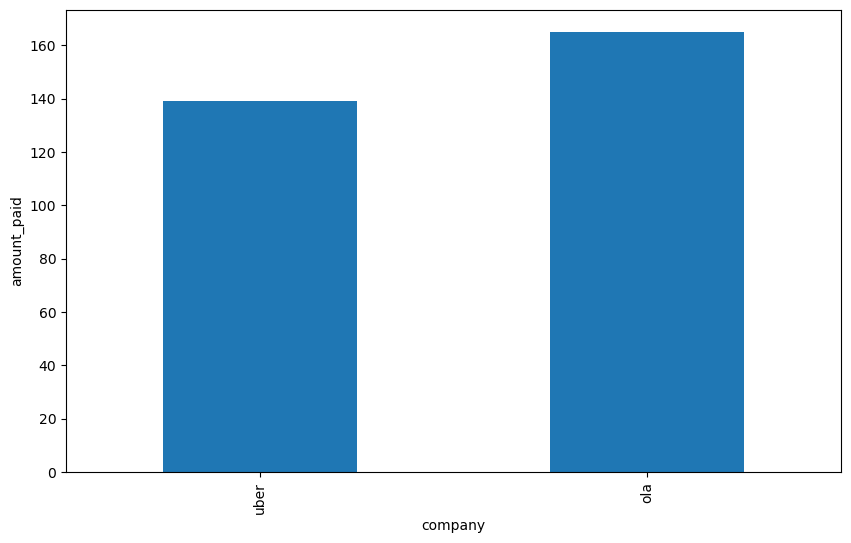

In [1710]:
plt.figure(figsize=(10,6))
data.groupby('company')['amount_paid'].median().sort_values().plot.bar()
plt.ylabel('amount_paid')
plt.show()

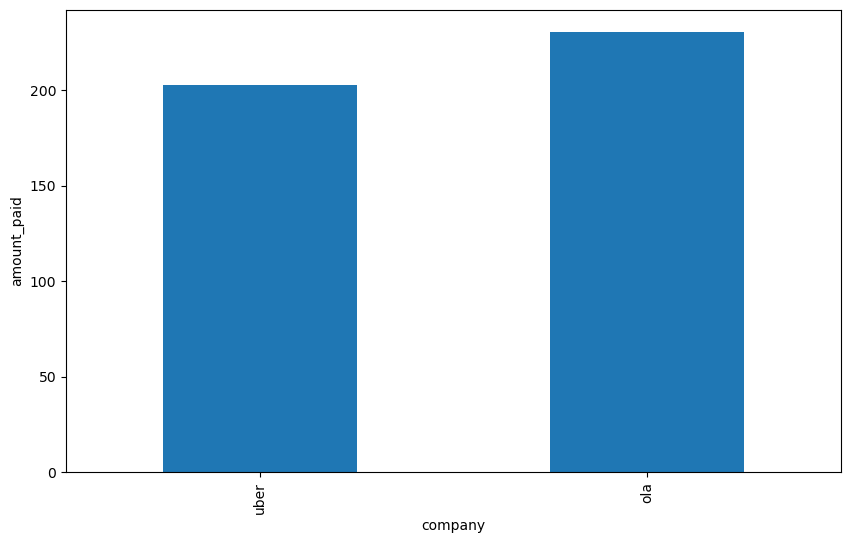

In [1711]:
plt.figure(figsize=(10,6))
data.groupby('company')['amount_paid'].mean().sort_values().plot.bar()
plt.ylabel('amount_paid')
plt.show()

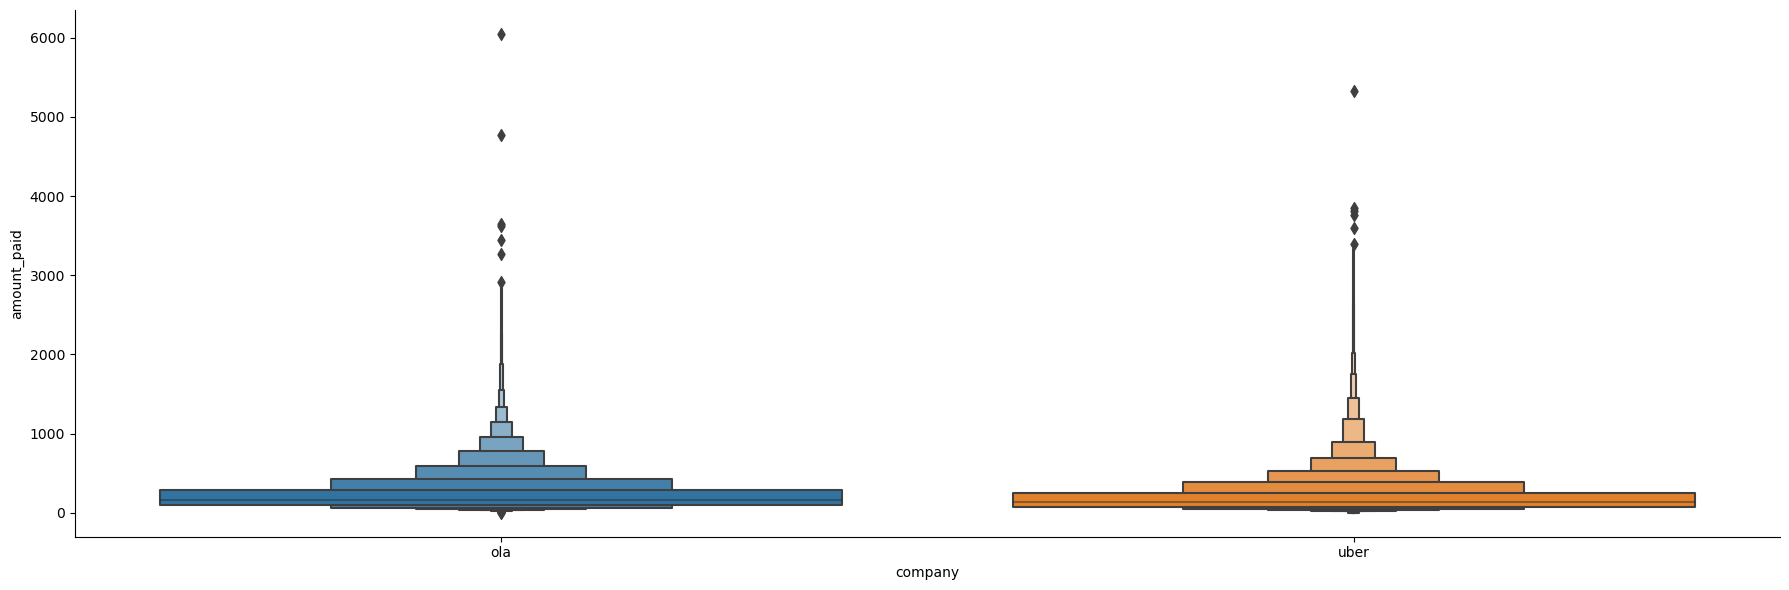

In [1712]:
sns.catplot(y = "amount_paid", x = "company", data =data.sort_values("amount_paid", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


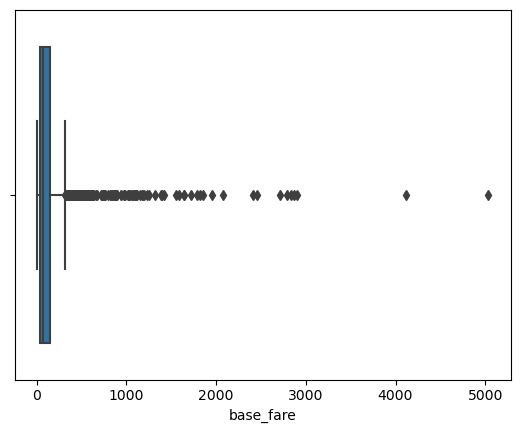

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


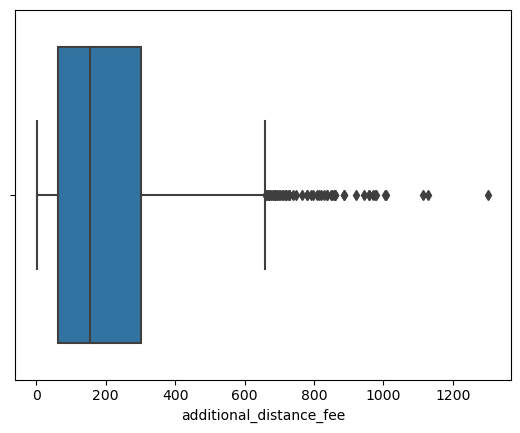

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


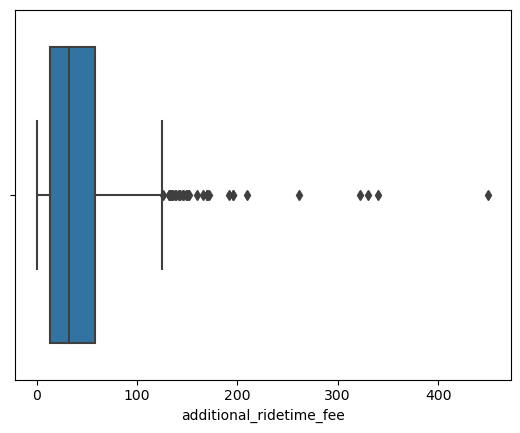

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


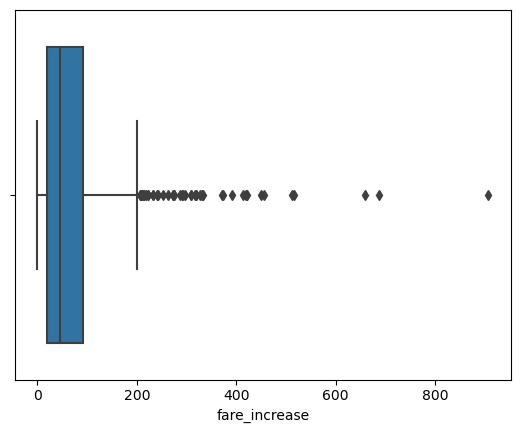

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


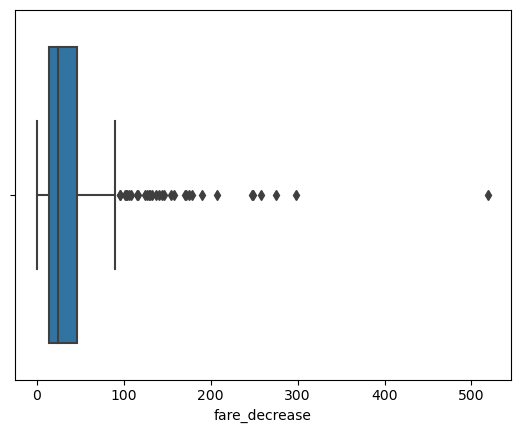

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


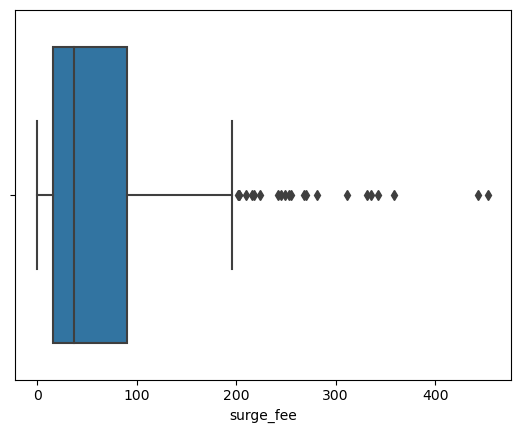

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


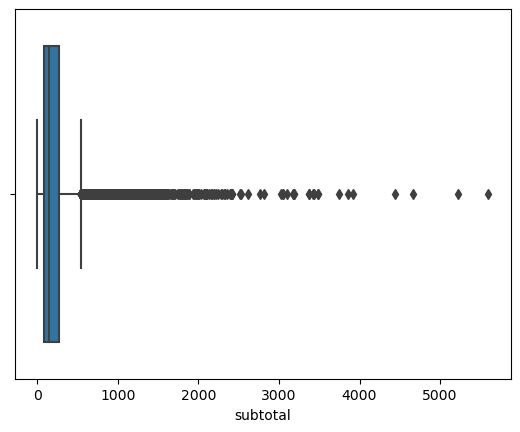

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


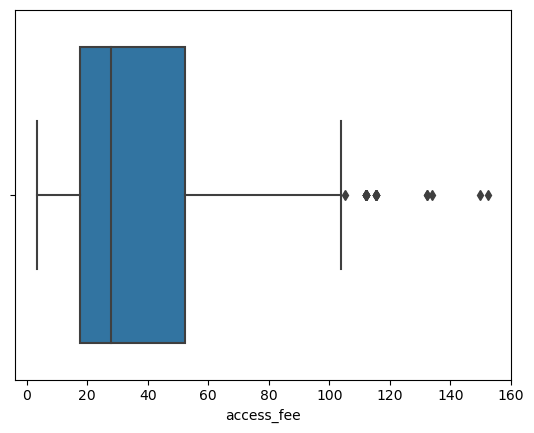

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


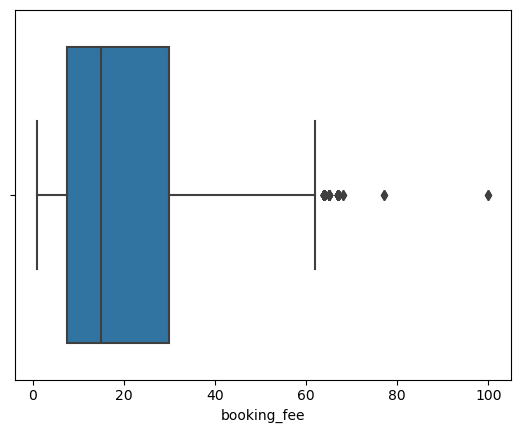

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


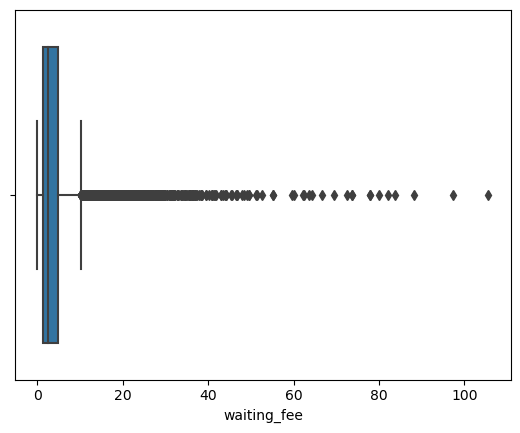

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


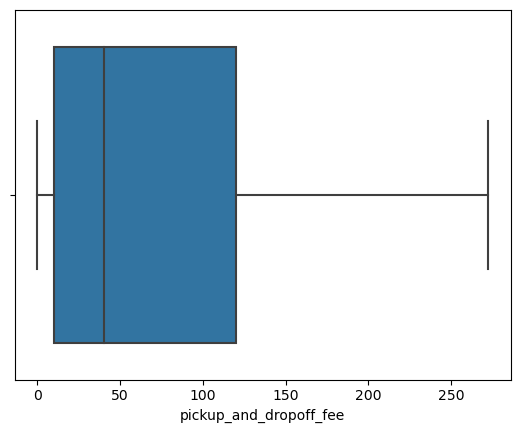

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


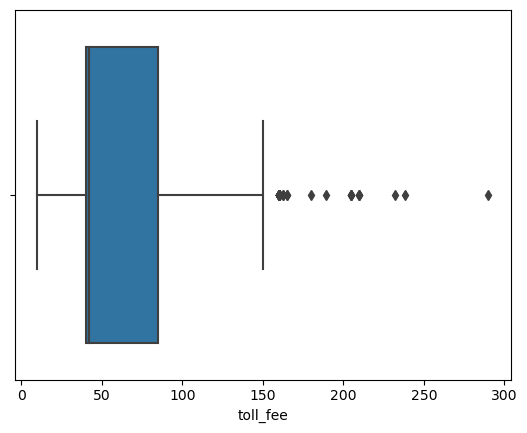

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


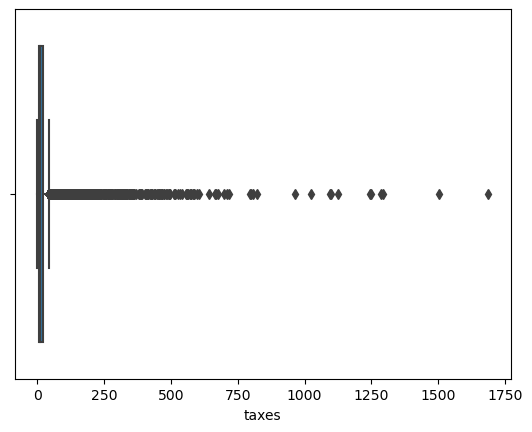

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


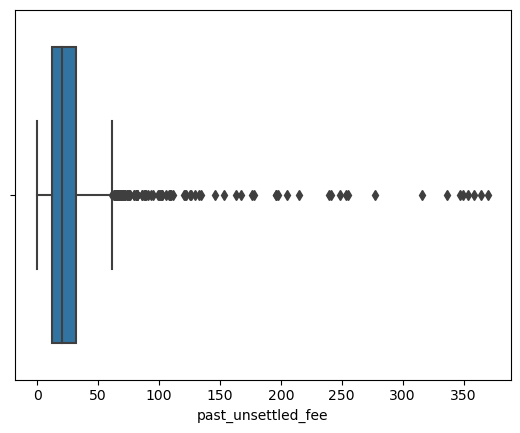

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


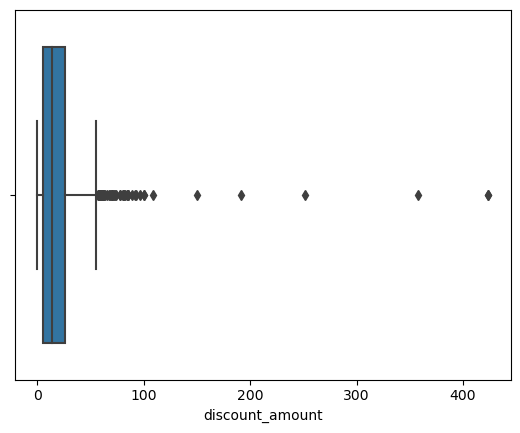

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


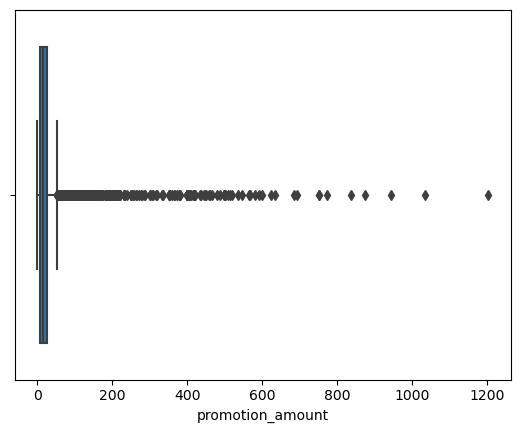

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


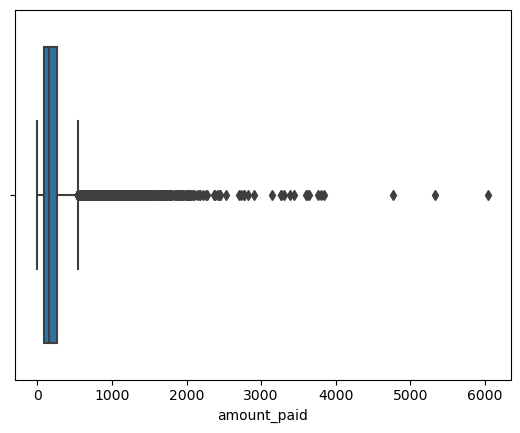

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


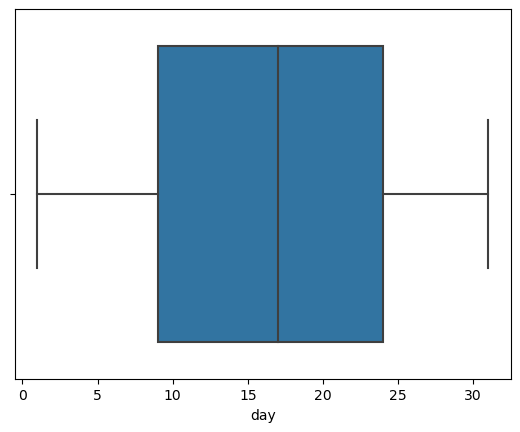

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


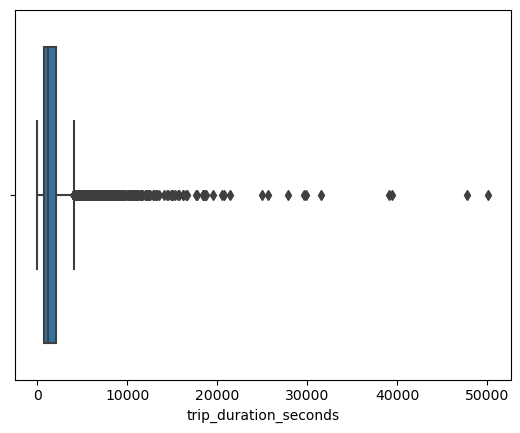

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


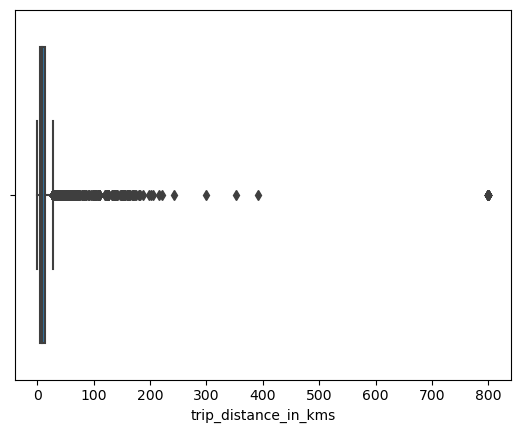

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


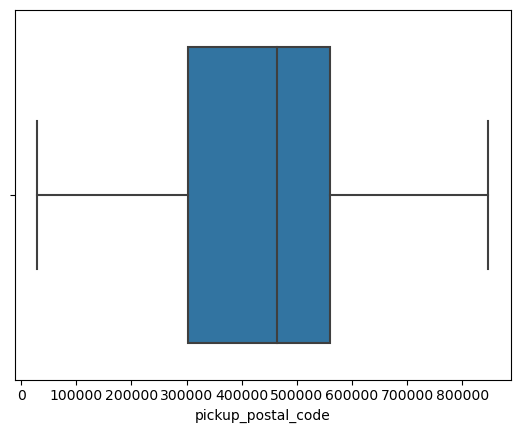

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


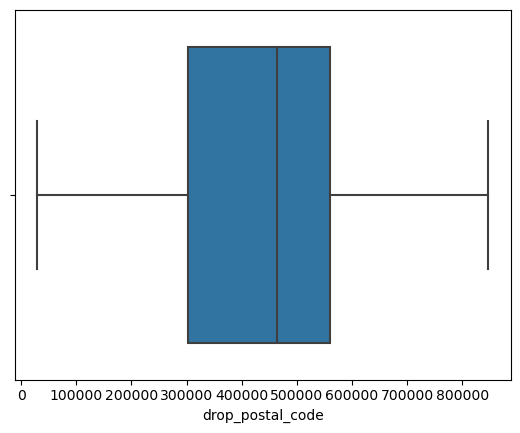

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


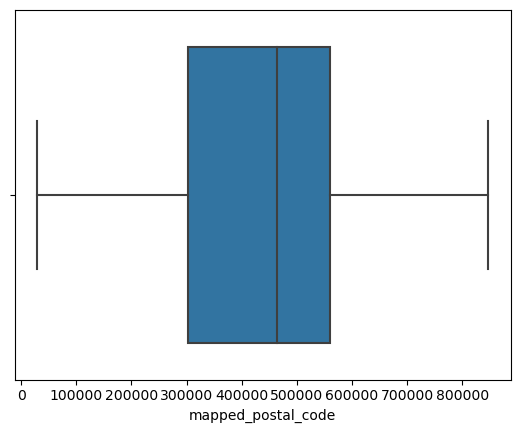

In [1713]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()


C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


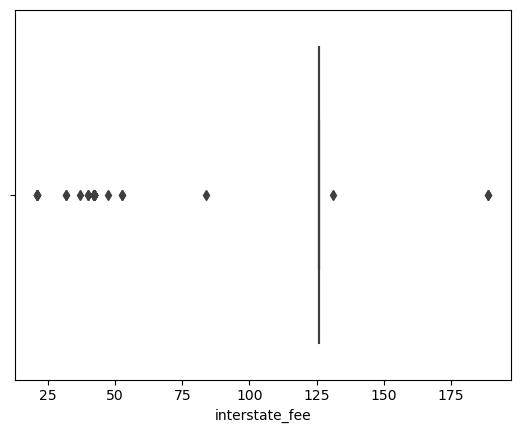

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


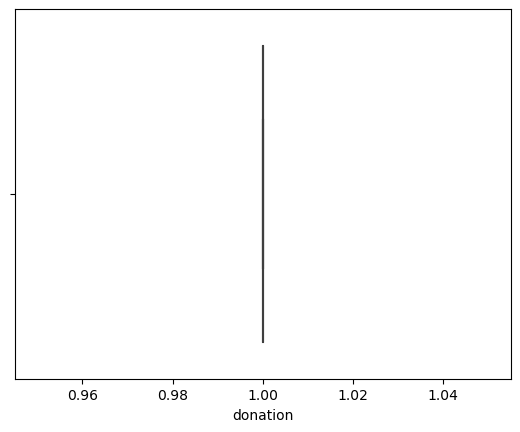

In [1714]:
for feature in disc_feature:
    sns.boxplot(data[feature])
    plt.show()

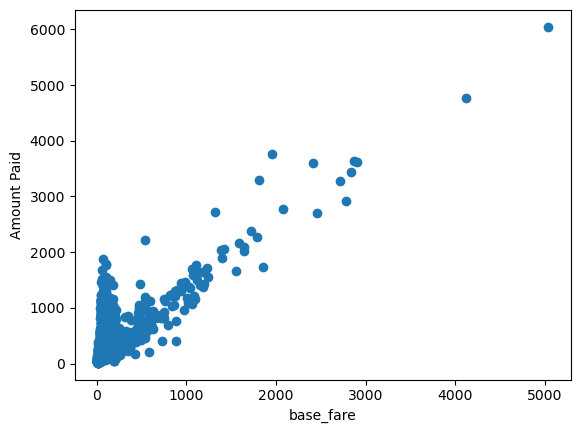

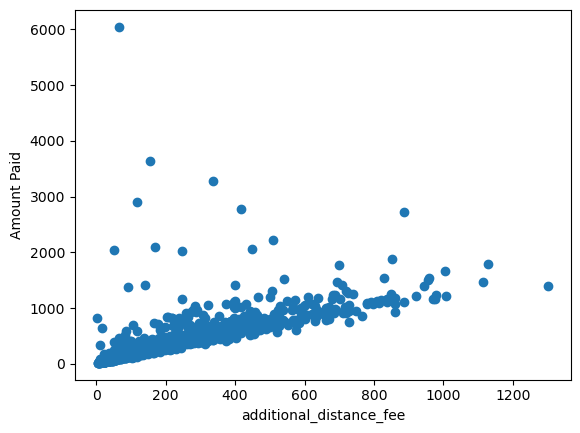

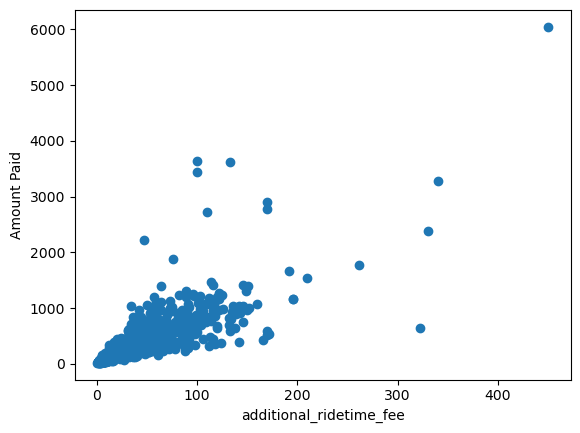

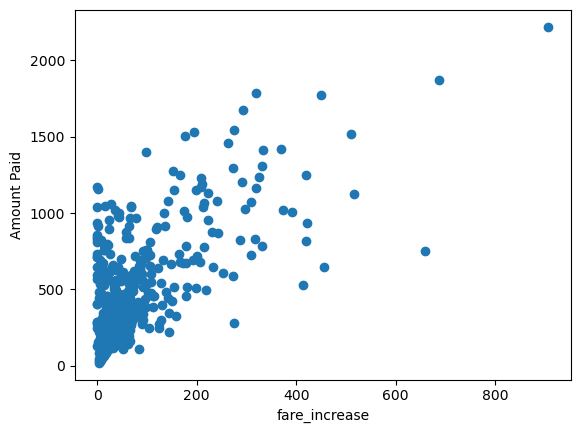

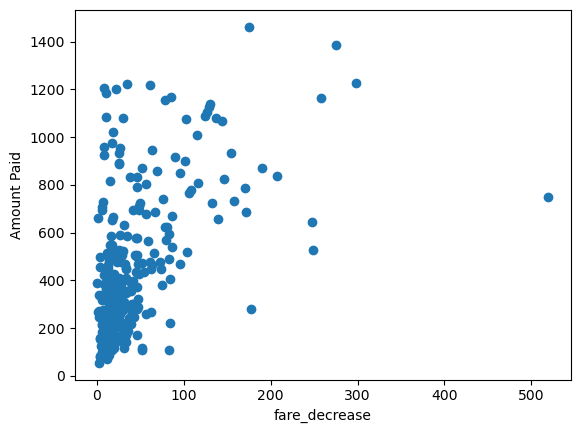

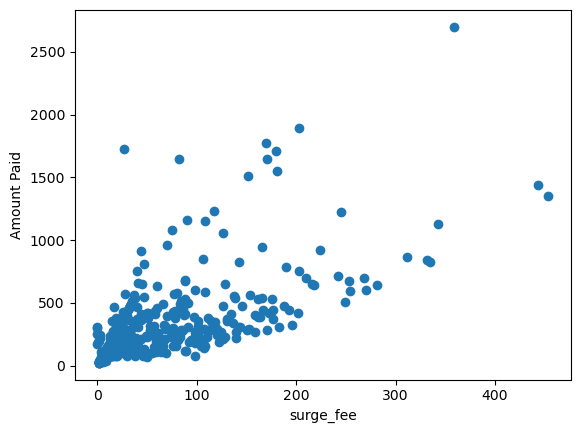

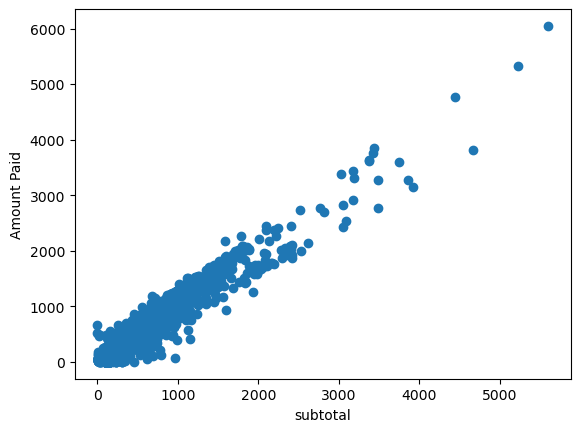

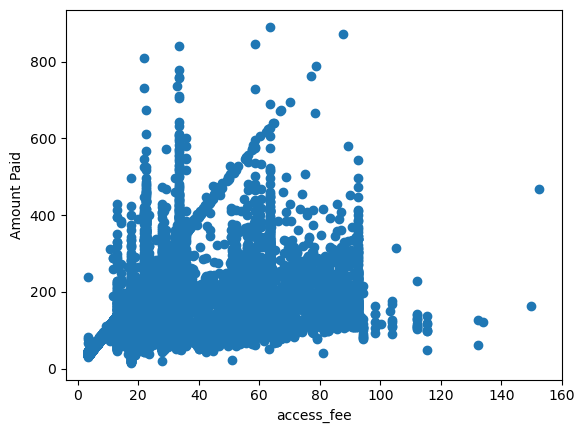

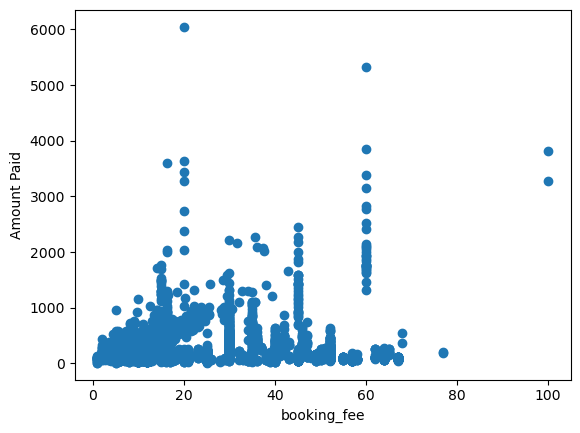

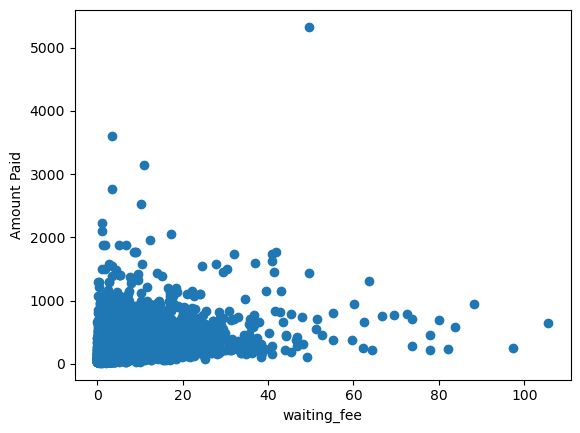

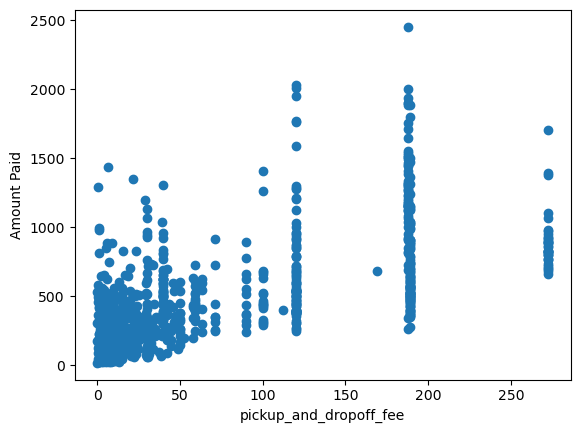

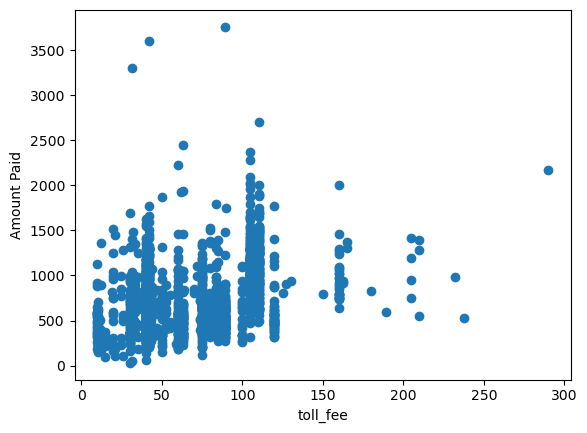

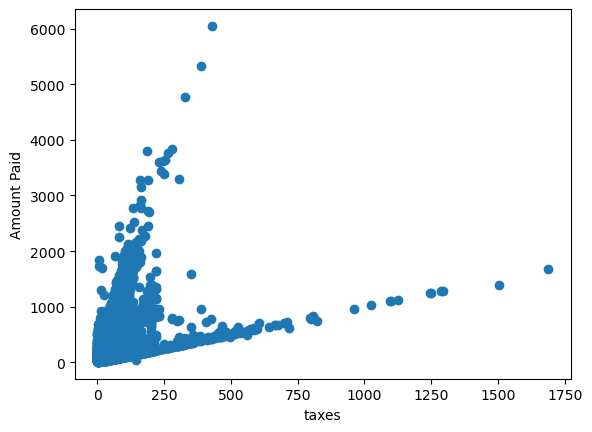

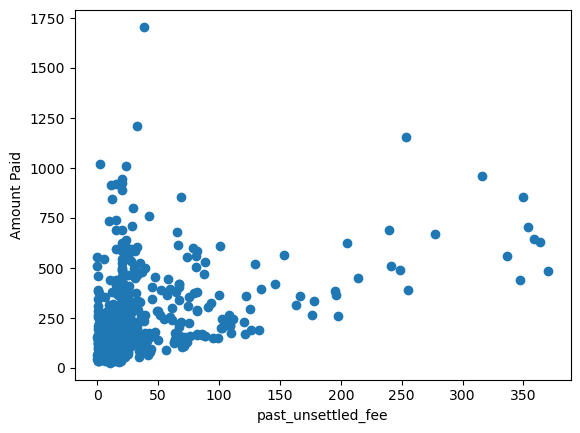

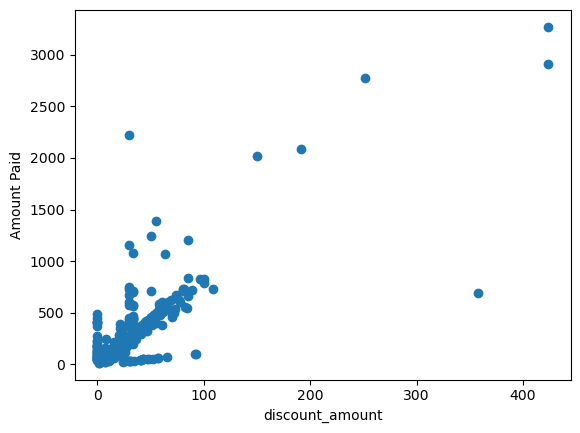

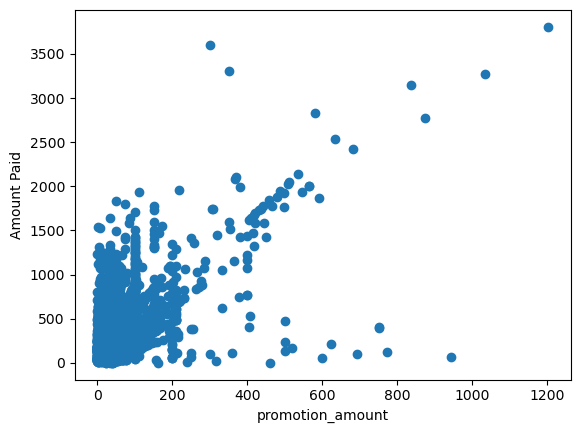

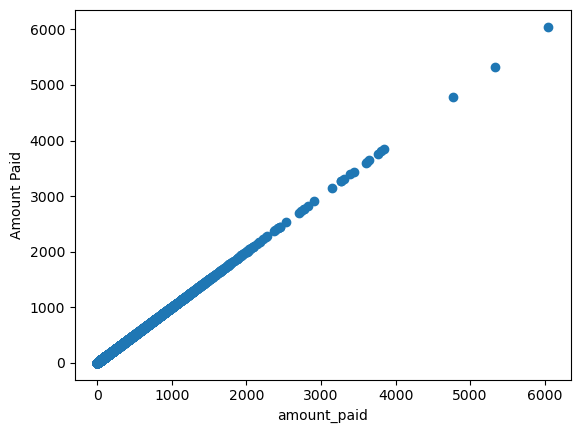

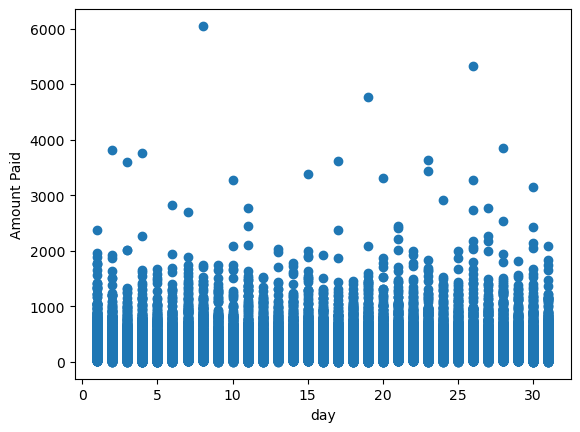

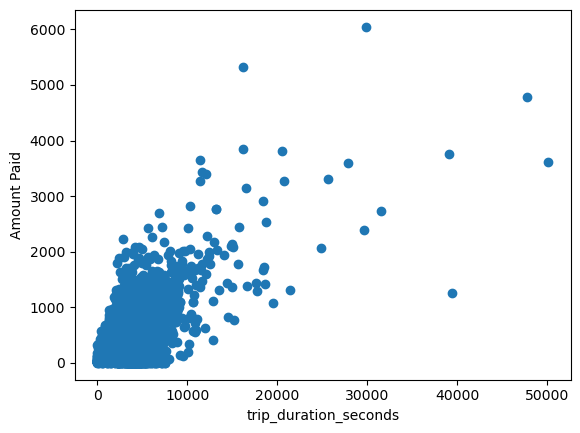

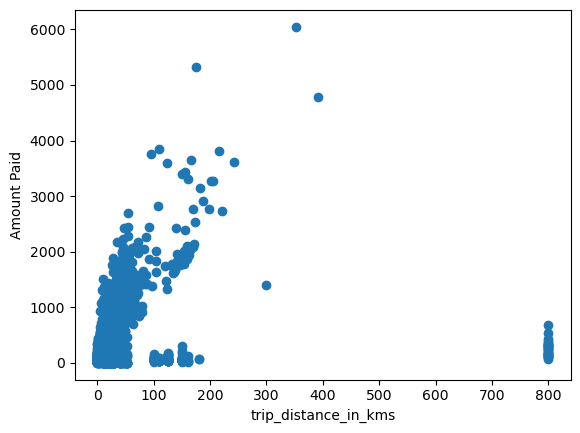

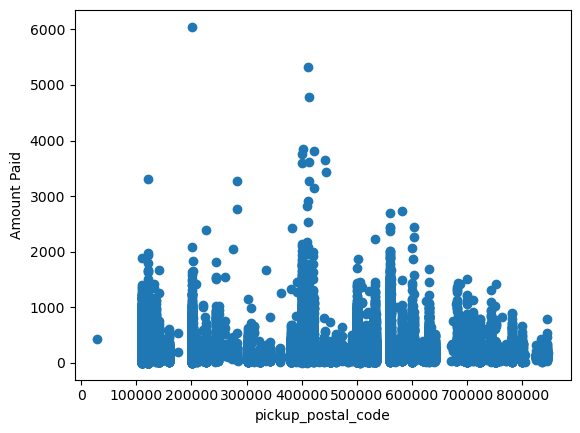

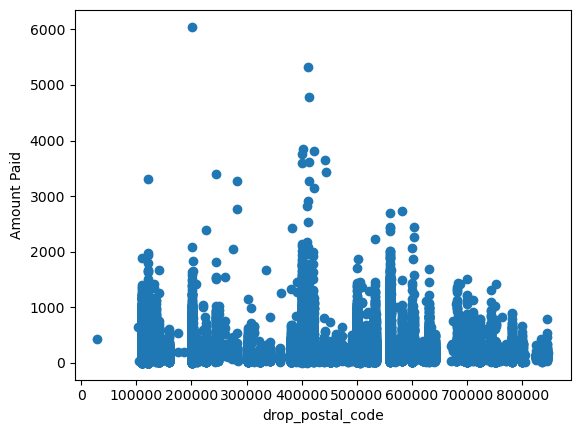

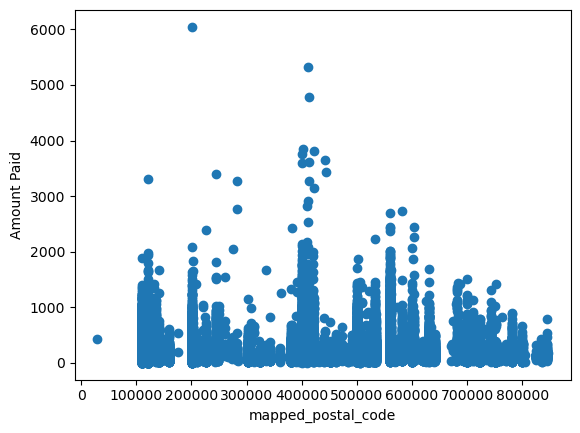

In [1715]:
for feature in cont_features:
    plt.scatter(data[feature],data['amount_paid'])
    plt.xlabel(feature)
    plt.ylabel('Amount Paid')
    plt.show()


# Categorizing variables into categorical and numerical variables based on datatype
Further dividing numerical in continous and discrete variables

In [1716]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
cont_features=[feature for feature in num_features if len(data[feature].unique())>25]
disc_feature=[feature for feature in num_features if len(data[feature].unique())<25]

In [1717]:
for feature in cat_features:
    print(feature,len(data[feature].unique()))

company 2
other_charges_fee 72
other_charges 28
applied_coupon 130
user_onboard_at 14325
payment_method 21
trip_start_time 1439
trip_end_time 1440
vehicle_type 691
pickup_city 271
drop_city 272
city 329
district 211
district_grp 187
state 29
zone 5
metro 3
tier 4
age_group 7
user_gender 5
user_state 32


# Replacing null values to non-null based on observation of mean,median,mode of the respective variable.
Replacing data having less frequency with data having significant frequency.
(To handle data-loss and convert into meaningful dataset)

In [1718]:
array=data['company'].value_counts().sort_values(ascending=False).to_dict()
company_array_map={k:i for i,k in enumerate(array,0)}
data['company_encoded']=data['company'].map(company_array_map)
array


{'ola': 25412, 'uber': 23078}

In [1719]:
array=data['payment_method'].value_counts().sort_values(ascending=False).to_dict()
data['payment_method'].replace({'VPA':'cash','0413 (India)':'cash','2850':'cash','UPI|Switch':'cash',
                                 'Voucher':'cash','Meet Bhavinbhai':'cash','PhonePe Wallet':'cash','Cash':'cash'},inplace=True)
data['payment_method'].fillna('cash',inplace=True)
payment_array=data['payment_method'].value_counts().sort_values(ascending=False).to_dict()
payment_array_map={k:i for i,k in enumerate(payment_array,0)}
data['payment_method_encoded']=data['payment_method'].map(payment_array_map)

In [1720]:
cat_feature_encoded_list=["payment_method","metro","tier","user_gender","user_state","age_group","zone","state",]

In [1721]:
metro_array=data['metro'].value_counts().sort_values(ascending=False).to_dict()
metro_array_map={k:i for i,k in enumerate(metro_array,0)}
data['metro'].fillna('yes',inplace=True)
data['metro_encoded']=data['metro'].map(metro_array_map)
metro_array_map

{'yes': 0, 'no': 1}

In [1722]:
for feature in cat_feature_encoded_list:
    print(feature,data[feature].value_counts().sort_values(ascending=False).to_dict())
    print(feature,data[feature].isnull().sum())

payment_method {'cash': 34929, 'UPI': 4428, 'OlaMoney Postpaid': 2916, 'credit/debit card': 1658, 'Paytm': 1347, 'Google Pay': 758, 'Amazon Pay': 753, 'PhonePe': 644, 'Paytm Wallet': 556, 'OlaMoney Wallet': 223, 'Uber Cash': 218, 'Payment Pending': 60}
payment_method 0
metro {'yes': 42834, 'no': 5656}
metro 0
tier {'tier1': 36557, 'tier3': 5656, 'tier2': 5499}
tier 778
user_gender {'male': 34551, 'female': 11010, 'other': 472, 'not selected': 3}
user_gender 2454
user_state {'Maharashtra': 8222, 'Karnataka': 6476, 'National Capital Territory of Delhi': 6428, 'Telangana': 5310, 'Tamil Nadu': 4223, 'West Bengal': 2381, 'Uttar Pradesh': 1990, 'Rajasthan': 1954, 'Gujarat': 1694, 'Haryana': 1045, 'Kerala': 973, 'Andhra Pradesh': 755, 'Bihar': 739, 'Madhya Pradesh': 681, 'Odisha': 596, 'Punjab': 547, 'Assam': 390, 'Chandigarh': 161, 'Chhattisgarh': 139, 'Himachal Pradesh': 127, 'Jharkhand': 93, 'Manipur': 78, 'Uttarakhand': 67, 'Goa': 48, 'Meghalaya': 42, 'Tripura': 15, 'Nagaland': 7, 'Union 

In [1723]:
tier_array=data['tier'].value_counts().sort_values(ascending=False).to_dict()
tier_array

{'tier1': 36557, 'tier3': 5656, 'tier2': 5499}

In [1724]:
tier_array=data['tier'].value_counts().sort_values(ascending=False).to_dict()
tier_array_map={k:i for i,k in enumerate(tier_array,0)}
data['tier'].fillna('tier1',inplace=True)
data['tier_encoded']=data['tier'].map(tier_array_map)
tier_array_map

{'tier1': 0, 'tier3': 1, 'tier2': 2}

In [1725]:
user_gender_array=data['user_gender'].value_counts().sort_values(ascending=False).to_dict()
data['user_gender'].replace({'yes':'male','other':'male','not selected':'male'},inplace=True)
data['user_gender'].fillna('male',inplace=True)
user_gender_array_map={k:i for i,k in enumerate(user_gender_array,0)}
data['user_gender_encoded']=data['user_gender'].map(user_gender_array_map)
user_gender_array_map

{'male': 0, 'female': 1, 'other': 2, 'not selected': 3}

In [1726]:
user_state_array=data['user_state'].value_counts().sort_values(ascending=False).to_dict()
data['user_state'].replace({'Tripura':'Maharashtra', 'Nagaland':'Maharashtra', 'Union Territory of Puducherry':'Maharashtra','Andaman and Nicobar':'Maharashtra', 'Arunachal Pradesh':'Maharashtra', 'Jammu and Kashmir':'Maharashtra'},inplace=True)
data['user_state'].fillna('Maharashtra',inplace=True)
user_state_array_map={k:i for i,k in enumerate(user_state_array,0)}
data['user_state_encoded']=data['user_state'].map(user_state_array_map)
user_state_array_map

{'Maharashtra': 0,
 'Karnataka': 1,
 'National Capital Territory of Delhi': 2,
 'Telangana': 3,
 'Tamil Nadu': 4,
 'West Bengal': 5,
 'Uttar Pradesh': 6,
 'Rajasthan': 7,
 'Gujarat': 8,
 'Haryana': 9,
 'Kerala': 10,
 'Andhra Pradesh': 11,
 'Bihar': 12,
 'Madhya Pradesh': 13,
 'Odisha': 14,
 'Punjab': 15,
 'Assam': 16,
 'Chandigarh': 17,
 'Chhattisgarh': 18,
 'Himachal Pradesh': 19,
 'Jharkhand': 20,
 'Manipur': 21,
 'Uttarakhand': 22,
 'Goa': 23,
 'Meghalaya': 24,
 'Tripura': 25,
 'Nagaland': 26,
 'Union Territory of Puducherry': 27,
 'Andaman and Nicobar': 28,
 'Arunachal Pradesh': 29,
 'Jammu and Kashmir': 30}

In [1727]:
age_group_array=data['age_group'].value_counts().sort_values(ascending=False).to_dict()
data['age_group'].fillna('25-35',inplace=True)
age_group_array_map={k:i for i,k in enumerate(age_group_array,0)}
data['age_group_encoded']=data['age_group'].map(age_group_array_map)
age_group_array_map

{'25-35': 0, '18-25': 1, '35-45': 2, '45-55': 3, '55+': 4, '0-18': 5}

In [1728]:
zone_array=data['zone'].value_counts().sort_values(ascending=False).to_dict()
data['zone'].fillna('south',inplace=True)
zone_array_map={k:i for i,k in enumerate(zone_array,0)}
data['zone_encoded']=data['zone'].map(zone_array_map)
zone_array_map

{'south': 0, 'north': 1, 'west': 2, 'east': 3}

In [1729]:
state_array=data['state'].value_counts().sort_values(ascending=False).to_dict()
data['state'].replace({'chattisgarh':'maharashtra', 'goa':'maharashtra', 'jammu & kashmir':'maharashtra', 'pondicherry':'maharashtra', 'daman & diu':'maharashtra', 'manipur':'maharashtra'},inplace=True)
data['state'].fillna('maharashtra',inplace=True)
state_array_map={k:i for i,k in enumerate(state_array,0)}
data['state_encoded']=data['state'].map(state_array_map)
state_array_map
data['state_encoded']

0         2
1         0
2         1
3         1
4         1
         ..
48485    12
48486     0
48487     1
48488     1
48489    11
Name: state_encoded, Length: 48490, dtype: int64

In [1730]:
for feature in cont_features:
    print(feature,np.mean(data[feature]))
    print(feature,data[feature].isnull().sum())

base_fare 165.8567994939912
base_fare 46909
additional_distance_fee 215.91687612208307
additional_distance_fee 47376
additional_ridetime_fee 41.883795121951216
additional_ridetime_fee 47465
fare_increase 81.2398636363637
fare_increase 48050
fare_decrease 42.01171974522292
fare_decrease 48176
surge_fee 64.56983253588514
surge_fee 48072
subtotal 208.83869519488277
subtotal 0
access_fee 33.95245323865623
access_fee 36942
booking_fee 20.75321500856293
booking_fee 42067
waiting_fee 4.466169011192009
waiting_fee 38751
pickup_and_dropoff_fee 74.65941513761476
pickup_and_dropoff_fee 47618
toll_fee 62.33171738009282
toll_fee 46551
taxes 21.99880950443479
taxes 23912
past_unsettled_fee 35.73793277310936
past_unsettled_fee 47895
discount_amount 20.79093935790723
discount_amount 47649
promotion_amount 22.748490218826475
promotion_amount 23493
amount_paid 217.4613458445038
amount_paid 0
day 16.324994844297795
day 0
trip_duration_seconds 1579.4737092779576
trip_duration_seconds 6498
trip_distance_in

In [1731]:
data.drop(['base_fare','additional_distance_fee','fare_increase','fare_decrease','surge_fee','toll_fee','pickup_and_dropoff_fee','past_unsettled_fee','discount_amount','donation','user_onboard_at','applied_coupon','city','district_grp','other_charges','other_charges_fee'],inplace=True,axis=1)

# Deriving three types of vehicle type category

In [1732]:
ans=[]
for i in data['vehicle_type']:
    listt=str(i).split(' ')
    if listt[0]=="Connect" or listt[0]=="Moto" or listt[0]=="Bike":
        new_value="Bike"
    elif len(listt)>1 and listt[1]=="Moto":
        new_value="Bike"
    elif listt[0]=="Auto":
        new_value="Auto"
    elif len(listt)>1 and listt[1]=="Auto":
        new_value="Auto"
    else:
        new_value="Cab"
    ans.append(new_value)
data['vehicle_type'] = ans
vehicle_type_array=data['vehicle_type'].value_counts().sort_values(ascending=False).to_dict()
data['vehicle_type'].fillna('Cab',inplace=True)
vehicle_type_array_map={k:i for i,k in enumerate(vehicle_type_array,0)}
data['vehicle_type_encoded']=data['vehicle_type'].map(vehicle_type_array_map)
vehicle_type_array_map

{'Cab': 0, 'Auto': 1, 'Bike': 2}

# Converting Categorical variables to label encoded data.

In [1733]:
trip_time_list=["trip_start_time","trip_end_time"]
for i in trip_time_list:
    data[i].fillna(0,inplace=True)
    trip_start_time_array=data[i].to_list()
    duration_hour=[]
    duration_min=[]
    for item in trip_start_time_array:
        if(item == 0):
            duration_hour.append(0)
            duration_min.append(0)
        else:
            split_data=item.split(":")
            duration_hour.append(int(split_data[0]))
            duration_min.append(int(split_data[1]))
    hour_mean=np.mean(duration_hour)
    min_mean=np.mean(duration_min)
    encoded_hour_column=i+"_hour"
    encoded_min_column=i+"_min"
    data[encoded_hour_column]=duration_hour
    data[encoded_min_column]=duration_min

    for i in data[encoded_hour_column]:
        if i==0:
            i=hour_mean

    for i in data[encoded_min_column]:
        if i==0:
            i=min_mean

In [1734]:
city_list_encoded=['pickup_city','drop_city','district']
for feature in city_list_encoded:
    print(feature,data[feature].value_counts().sort_values(ascending=False).to_dict())
    print(feature,data[feature].isnull().sum())

pickup_city {'bangalore': 5775, 'hyderabad': 4987, 'new delhi': 4126, 'mumbai': 3580, 'chennai': 3027, 'pune': 2727, 'gurgaon': 2321, 'bengaluru': 1997, 'kolkata': 1789, 'jaipur': 1571, 'ahmedabad': 1149, 'gautam buddha nagar': 807, 'lucknow': 730, 'navi mumbai': 593, 'bhubaneswar': 503, 'ghaziabad': 488, 'guwahati': 408, 'vijayawada': 382, 'thane': 379, 'greater noida': 343, 'nagpur': 326, 'indore': 292, 'bhopal': 273, 'uttara kannada': 273, 'ernakulam': 236, 'chandigarh': 233, 'mysore': 205, 'nashik': 192, 'faridabad': 183, 'coimbatore': 167, 'vishakhapatnam': 167, 'kanpur': 159, 'surat': 157, 'west godavari': 156, 'kalyan': 152, 'kota': 151, 'howrah': 127, 'dehradun': 126, 'patna': 121, 'ludhiana': 120, 'thanesar': 115, 'kolkatta': 115, 'vadodara': 94, 'noida': 91, 'gandhinagar': 86, 'trivandrum': 84, 'rangareddy': 79, 'madurai': 74, 'bhiwandi': 67, 'panvel': 67, 'ulhasnagar': 66, 'mysuru': 65, 'mohali': 64, 'udaipur': 56, 'sanaswadi': 56, 'suratgarh': 55, 'ranchi': 54, 'yamunanagar

In [1735]:
pickup_city_array=data['pickup_city'].value_counts().sort_values(ascending=False).to_dict()
data['pickup_city'].replace({'bengaluru':'bangalore','aurangabad':'bangalore', 'raipur':'bangalore', 'amer':'bangalore', 'amritsar':'bangalore', 'gwalior': 'bangalore', 'miraj':'bangalore', 'gorakhpur':'bangalore', 'virar':'bangalore', 'rourkela':'bangalore', 'dadri':'bangalore', 'tiruchirappalli': 'bangalore', 'badlapur':'bangalore', 'kharagpur':'bangalore', 'jabalpur':'bangalore', 'jagraon':'bangalore', 'ranga reddy':'bangalore', 'nallasopara':'bangalore', 'tambaram':'bangalore', 'aluva':'bangalore', 'nellore':'bangalore', 'kochi':'bangalore', 'cuttack':'bangalore', 'jamshedpur':'bangalore', 'sitapur': 'bangalore', 'tirupati':'bangalore', 'jalandhar':'bangalore', 'raipur rani':'bangalore', 'sonipat':'bangalore', 'rajpura': 'bangalore', 'bangalore north':'bangalore', 'rajahmundry':'bangalore', 'grasim vihar rawan':'bangalore', 'kanchipuram':'bangalore', 'east godavari':'bangalore', 'abu road':'bangalore', 'dharamkot':'bangalore', 'sriperumpudur':'bangalore', 'koch bihar':'bangalore', 'thrissur':'bangalore', 'thanjavur':'bangalore', 'bangalore south':'bangalore', 'mangalagiri':'bangalore', 'ramachandrapuram':'bangalore', 'jagiroad':'bangalore', 'sriperumbudur': 'bangalore', 'ranip': 'bangalore', 'ambala city': 'bangalore', 'thiruvananthapuram': 'bangalore', 'salem': 'bangalore', 'ambala': 'bangalore', 'patiala': 'bangalore', 'karimnagar': 'bangalore', 'baghpat': 'bangalore', 'barabanki': 'bangalore', 'north parganas': 'bangalore', 'hoskote': 'bangalore', 'uttarpara': 'bangalore', 'warangal': 'bangalore', 'bareilly': 'bangalore', 'bilaspur': 'bangalore', 'siliguri': 'bangalore', 'north guwahati': 'bangalore', 'tiruvallur': 'bangalore', 'rajkot': 'bangalore', 'narasannapeta': 'bangalore', 'kakinada': 'bangalore', 'chengalpattu': 'bangalore', 'patna sadar': 'bangalore', 'barasat': 'bangalore', 'parkal': 'bangalore', 'kalol': 'bangalore', 'mainpuri': 'bangalore', 'depalpur': 'bangalore', 'krishna': 'bangalore', 'kozhikode': 'bangalore', 'shivajinagar': 'bangalore', 'salempur': 'bangalore', 'sonepat': 'bangalore', 'durg': 'bangalore', 'bahadurgarh': 'bangalore', 'anakapalle': 'bangalore', 'modinagar': 'bangalore', 'bhadreswar': 'bangalore', 'sadar': 'bangalore', 'berhampur': 'bangalore', 'vaishali': 'bangalore', 'sohna': 'bangalore', 'ramapuram': 'bangalore', 'ramanathapuram': 'bangalore', 'pondicherry': 'bangalore', 'puri': 'bangalore', 'meerut': 'bangalore', 'jatni': 'bangalore', 'kalmeshwar': 'bangalore', 'perumbavoor': 'bangalore', 'kurali': 'bangalore', 'mamallapuram': 'bangalore', 'bulandshahr': 'bangalore', 'mahabub nagar': 'bangalore', 'tohana': 'bangalore', 'bangalore rural': 'bangalore', 'err':'bangalore', 'mubarakpur': 'bangalore', 'kalanwali': 'bangalore', 'mohpa': 'bangalore', 'loni': 'bangalore', 'vapi': 'bangalore', 'bokaro': 'bangalore', 'aroor': 'bangalore', 'jamnagar': 'bangalore', 'south goa': 'bangalore', 'sawer': 'bangalore', 'charkhi dadri': 'bangalore', 'hanuman junction': 'bangalore', 'mandi dabwali': 'bangalore', 'patancheru': 'bangalore', 'central delhi': 'bangalore', 'narendra nagar': 'bangalore', 'rishra': 'bangalore', 'jhansi': 'bangalore', 'khandala': 'bangalore', 'durgapur': 'bangalore', 'rewari stn': 'bangalore', 'koilkuntla': 'bangalore', 'mathura': 'bangalore', 'neral': 'bangalore', 'anand': 'bangalore', 'konnagar': 'bangalore', 'tirurangadi': 'bangalore', 'kaipamangalam': 'bangalore', 'dharwad': 'bangalore', 'kanpur nagar': 'bangalore', 'olpad': 'bangalore', 'villupuram': 'bangalore', 'anantapur': 'bangalore', 'pen': 'bangalore', 'alappuzha': 'bangalore', 'mahboobnagar': 'bangalore', 'matheran': 'bangalore', 'hosur': 'bangalore', 'shirwal': 'bangalore', 'alibag': 'bangalore', 'unnao': 'bangalore', 'choutuppal': 'bangalore', 'alipore': 'bangalore', 'hapur': 'bangalore', 'gotanagar': 'bangalore', 'chakan': 'bangalore', 'cherthala': 'bangalore', 'anandpur sahib': 'bangalore', 'qadian': 'bangalore', 'dankuni': 'bangalore', 'muzaffarnagar': 'bangalore', 'khopoli': 'bangalore', 'palanpur': 'bangalore', 'siddipet': 'bangalore', 'sawai madhopur': 'bangalore', 'bari sadri': 'bangalore', 'chiknayakanhalli': 'bangalore', 'dwarka': 'bangalore', 'palwal': 'bangalore', 'khudaganj': 'bangalore', 'shahapur': 'bangalore', 'k.v.rangareddy': 'bangalore', 'asansol': 'bangalore', 'bhubaneshwar': 'bangalore', 'fatehgarh sahib': 'bangalore', 'dhanbad': 'bangalore', 'kanyakumari': 'bangalore', 'panjim': 'bangalore', 'kankinara': 'bangalore', 'palampur': 'bangalore', 'sholinghur': 'bangalore', 'kolhapur': 'bangalore', 'hooghly': 'bangalore', 'kangayam': 'bangalore', 'hamirpur': 'bangalore', 'dharuhera': 'bangalore', 'ashok nagar': 'bangalore', 'hassanpur': 'bangalore', 'srikakulam': 'bangalore', 'sanand': 'bangalore', 'amravati': 'bangalore', 'hajipur': 'bangalore', 'khairlanji': 'bangalore', 'uran': 'bangalore', 'choryasi': 'bangalore', 'melur': 'bangalore', 'krishnarajpet': 'bangalore', 'tirupur': 'bangalore', 'sikar': 'bangalore', 'cheyyar': 'bangalore', 'phagwara': 'bangalore', 'shrivardhan': 'bangalore', 'mount abu': 'bangalore', 'sangareddy':'bangalore'},inplace=True)
data['pickup_city'].fillna('bangalore',inplace=True)
pickup_city_array_map={k:i for i,k in enumerate(pickup_city_array,0)}
data['pickup_city_encoded']=data['pickup_city'].map(pickup_city_array_map)
pickup_city_array_map

{'bangalore': 0,
 'hyderabad': 1,
 'new delhi': 2,
 'mumbai': 3,
 'chennai': 4,
 'pune': 5,
 'gurgaon': 6,
 'bengaluru': 7,
 'kolkata': 8,
 'jaipur': 9,
 'ahmedabad': 10,
 'gautam buddha nagar': 11,
 'lucknow': 12,
 'navi mumbai': 13,
 'bhubaneswar': 14,
 'ghaziabad': 15,
 'guwahati': 16,
 'vijayawada': 17,
 'thane': 18,
 'greater noida': 19,
 'nagpur': 20,
 'indore': 21,
 'bhopal': 22,
 'uttara kannada': 23,
 'ernakulam': 24,
 'chandigarh': 25,
 'mysore': 26,
 'nashik': 27,
 'faridabad': 28,
 'coimbatore': 29,
 'vishakhapatnam': 30,
 'kanpur': 31,
 'surat': 32,
 'west godavari': 33,
 'kalyan': 34,
 'kota': 35,
 'howrah': 36,
 'dehradun': 37,
 'patna': 38,
 'ludhiana': 39,
 'thanesar': 40,
 'kolkatta': 41,
 'vadodara': 42,
 'noida': 43,
 'gandhinagar': 44,
 'trivandrum': 45,
 'rangareddy': 46,
 'madurai': 47,
 'bhiwandi': 48,
 'panvel': 49,
 'ulhasnagar': 50,
 'mysuru': 51,
 'mohali': 52,
 'udaipur': 53,
 'sanaswadi': 54,
 'suratgarh': 55,
 'ranchi': 56,
 'yamunanagar': 57,
 'visakhapa

In [1736]:
drop_city_array=data['drop_city'].value_counts().sort_values(ascending=False).to_dict()
data['drop_city'].fillna('bangalore',inplace=True)
data['drop_city'].replace({'bengaluru':'bangalore','aurangabad':'bangalore', 'raipur':'bangalore', 'amer':'bangalore', 'amritsar':'bangalore', 'gwalior': 'bangalore', 'miraj':'bangalore', 'gorakhpur':'bangalore', 'rourkela':'bangalore', 'dadri':'bangalore', 'virar':'bangalore', 'badlapur':'bangalore', 'kharagpur': 'bangalore', 'tiruchirappalli':'bangalore', 'jabalpur': 'bangalore', 'nallasopara': 'bangalore''bangalore', 'jagraon': 'bangalore''bangalore', 'ranga reddy': 'bangalore', 'aluva': 'bangalore', 'tambaram': 'bangalore', 'nellore': 'bangalore', 'kochi': 'bangalore', 'sitapur': 'bangalore', 'cuttack': 'bangalore', 'jamshedpur': 'bangalore', 'tirupati': 'bangalore', 'raipur rani':'bangalore', 'jalandhar':'bangalore', 'sonipat':'bangalore', 'grasim vihar rawan': 'bangalore', 'rajahmundry': 'bangalore', 'kanchipuram': 'bangalore', 'bangalore north': 'bangalore', 'rajpura': 'bangalore', 'east godavari': 'bangalore', 'abu road': 'bangalore', 'koch bihar': 'bangalore', 'thrissur': 'bangalore', 'dharamkot': 'bangalore', 'thanjavur': 'bangalore', 'mangalagiri': 'bangalore', 'bangalore south': 'bangalore', 'sriperumpudur': 'bangalore', 'sriperumbudur': 'bangalore', 'uttarpara': 'bangalore', 'thiruvananthapuram': 'bangalore', 'jagiroad': 'bangalore', 'ranip': 'bangalore', 'ramachandrapuram': 'bangalore', 'ambala city': 'bangalore', 'ambala': 'bangalore', 'north guwahati': 'bangalore', 'hoskote': 'bangalore', 'north': 'bangalore', 'parganas': 'bangalore', 'barasat': 'bangalore', 'siliguri': 'bangalore', 'salem': 'bangalore', 'karimnagar': 'bangalore', 'warangal': 'bangalore', 'bareilly': 'bangalore', 'rajkot': 'bangalore', 'barabanki': 'bangalore', 'baghpat': 'bangalore', 'tiruvallur': 'bangalore', 'patiala': 'bangalore', 'bilaspur': 'bangalore', 'kakinada': 'bangalore', 'patna sadar': 'bangalore', 'parkal': 'bangalore', 'chengalpattu': 'bangalore', 'narasannapeta': 'bangalore', 'modinagar': 'bangalore', 'mainpuri': 'bangalore', 'kozhikode': 'bangalore', 'krishna': 'bangalore', 'kalol': 'bangalore', 'bahadurgarh': 'bangalore', 'shivajinagar': 'bangalore', 'sadar': 'bangalore', 'anakapalle': 'bangalore', 'bhadreswar': 'bangalore', 'berhampur': 'bangalore', 'depalpur': 'bangalore', 'salempur': 'bangalore', 'sonepat': 'bangalore', 'durg': 'bangalore', 'south goa': 'bangalore', 'aroor': 'bangalore', 'mubarakpur': 'bangalore', 'mohpa': 'bangalore', 'kalmeshwar': 'bangalore', 'kalanwali': 'bangalore', 'sawer': 'bangalore', 'patancheru': 'bangalore', 'perumbavoor': 'bangalore', 'kurali': 'bangalore', 'mamallapuram': 'bangalore', 'sohna': 'bangalore', 'puri': 'bangalore', 'mandi dabwali': 'bangalore', 'jatni': 'bangalore', 'pondicherry': 'bangalore', 'ramapuram': 'bangalore', 'mahabub nagar': 'bangalore', 'tohana': 'bangalore', 'vapi': 'bangalore', 'ramanathapuram': 'bangalore', 'bangalore rural': 'bangalore', 'bokaro': 'bangalore', 'central delhi': 'bangalore', 'vaishali': 'bangalore', 'jamnagar': 'bangalore', 'loni': 'bangalore', 'err':'bangalore','charkhi dadri': 'bangalore', 'dharwad': 'bangalore', 'meerut': 'bangalore', 'hanuman junction': 'bangalore', 'bulandshahr': 'bangalore', 'rishra': 'bangalore', 'khandala': 'bangalore', 'muzaffarnagar': 'bangalore', 'alipore': 'bangalore', 'alibag': 'bangalore', 'shirwal': 'bangalore', 'mahboobnagar': 'bangalore', 'pen': 'bangalore', 'anandpur sahib': 'bangalore', 'hosur': 'bangalore', 'villupuram': 'bangalore', 'krishnarajpet': 'bangalore', 'uran': 'bangalore', 'matheran': 'bangalore', 'gotanagar': 'bangalore', 'olpad': 'bangalore', 'rewari stn': 'bangalore', 'durgapur': 'bangalore', 'jhansi': 'bangalore', 'unnao': 'bangalore', 'siddipet': 'bangalore', 'shahapur': 'bangalore', 'bari sadri': 'bangalore', 'mathura': 'bangalore', 'khopoli': 'bangalore', 'anand': 'bangalore', 'srikakulam': 'bangalore', 'konnagar': 'bangalore', 'kanpur nagar': 'bangalore', 'kankinara': 'bangalore', 'qadian': 'bangalore', 'koilkuntla': 'bangalore', 'anantapur': 'bangalore', 'choutuppal': 'bangalore', 'hapur': 'bangalore', 'k.v.rangareddy': 'bangalore', 'kaipamangalam': 'bangalore', 'moradabad': 'bangalore', 'neral': 'bangalore', 'kolhapur': 'bangalore', 'narendra nagar': 'bangalore', 'lunawada': 'bangalore', 'shrivardhan': 'bangalore', 'mount abu': 'bangalore', 'melur': 'bangalore', 'hamirpur': 'bangalore', 'dhanbad': 'bangalore', 'palampur': 'bangalore', 'panjim': 'bangalore', 'chiknayakanhalli': 'bangalore', 'cheyyar': 'bangalore', 'dharuhera': 'bangalore', 'sanand': 'bangalore', 'fatehgarh sahib': 'bangalore', 'asansol': 'bangalore', 'bhubaneshwar': 'bangalore', 'alappuzha': 'bangalore', 'kanyakumari': 'bangalore', 'phagwara': 'bangalore', 'sikar': 'bangalore', 'dankuni': 'bangalore', 'sawai madhopur': 'bangalore', 'cherthala': 'bangalore', 'palanpur': 'bangalore', 'tirurangadi': 'bangalore', 'hassanpur': 'bangalore', 'sholinghur': 'bangalore', 'chakan': 'bangalore', 'khudaganj': 'bangalore', 'dwarka': 'bangalore', 'tirupur': 'bangalore', 'kangayam': 'bangalore', 'palwal': 'bangalore', 'amravati': 'bangalore', 'hajipur': 'bangalore', 'khairlanji': 'bangalore', 'ashok nagar': 'bangalore', 'choryasi': 'bangalore', 'sangareddy': 'bangalore'},inplace=True)
drop_city_array_map={k:i for i,k in enumerate(drop_city_array,0)}
data['drop_city_encoded']=data['drop_city'].map(drop_city_array_map)
data['drop_city_encoded'].fillna(0,inplace=True)
drop_city_array_map

{'bangalore': 0,
 'hyderabad': 1,
 'new delhi': 2,
 'mumbai': 3,
 'chennai': 4,
 'pune': 5,
 'gurgaon': 6,
 'bengaluru': 7,
 'kolkata': 8,
 'jaipur': 9,
 'ahmedabad': 10,
 'gautam buddha nagar': 11,
 'lucknow': 12,
 'navi mumbai': 13,
 'bhubaneswar': 14,
 'ghaziabad': 15,
 'guwahati': 16,
 'vijayawada': 17,
 'thane': 18,
 'greater noida': 19,
 'nagpur': 20,
 'indore': 21,
 'bhopal': 22,
 'uttara kannada': 23,
 'ernakulam': 24,
 'chandigarh': 25,
 'mysore': 26,
 'nashik': 27,
 'faridabad': 28,
 'coimbatore': 29,
 'vishakhapatnam': 30,
 'kanpur': 31,
 'surat': 32,
 'west godavari': 33,
 'kalyan': 34,
 'kota': 35,
 'howrah': 36,
 'thanesar': 37,
 'dehradun': 38,
 'patna': 39,
 'ludhiana': 40,
 'kolkatta': 41,
 'vadodara': 42,
 'noida': 43,
 'gandhinagar': 44,
 'trivandrum': 45,
 'rangareddy': 46,
 'madurai': 47,
 'panvel': 48,
 'ulhasnagar': 49,
 'bhiwandi': 50,
 'mohali': 51,
 'mysuru': 52,
 'udaipur': 53,
 'sanaswadi': 54,
 'suratgarh': 55,
 'ranchi': 56,
 'yamunanagar': 57,
 'visakhapa

# Derived new column intercity from pickup city and dropcity

In [1737]:
data['intercity']=[-1]*(len(data))
for i in range(len(data)):
    pickup_city = data['pickup_city'].iloc[i]
    drop_city = data['drop_city'].iloc[i]
    if pickup_city != drop_city:
        data['intercity'][i]=1
    else:
        data['intercity'][i]=0
        
data['intercity']

C:\Users\dbansbanka\AppData\Local\Temp\ipykernel_30276\217178440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['intercity'][i]=0
C:\Users\dbansbanka\AppData\Local\Temp\ipykernel_30276\217178440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['intercity'][i]=1


0        0
1        0
2        0
3        0
4        0
        ..
48485    0
48486    0
48487    0
48488    0
48489    0
Name: intercity, Length: 48490, dtype: int64

In [1738]:
district_array=data['district'].value_counts().sort_values(ascending=False).to_dict()
data['district'].replace({'bengaluru':'bangalore','jabalpur':'bangalore', 'medak':'bangalore', 'east singhbhum':'bangalore', 'east midnapore':'bangalore', 'jalandhar':'bangalore', 'sonipat':'bangalore', 'chittoor':'bangalore', 'chikkaballapur':'bangalore', 'nellore':'bangalore', 'cuttack':'bangalore', 'raipur':'bangalore', 'hooghly':'hyderabad', 'warangal':'hyderabad', 'sirohi':'hyderabad', 'karim nagar':'hyderabad', 'anand':'hyderabad', 'guna':'hyderabad', 'udaipur':'hyderabad', 'moga':'hyderabad', 'rajkot':'hyderabad', 'cooch behar':'hyderabad', 'ariyalur':'hyderabad', 'raisen':'hyderabad', 'madurai':'hyderabad', 'marigaon':'bangalore', 'salem':'bangalore', 'bagpat': 'bangalore', 'bareilly': 'bangalore', 'darjiling': 'bangalore', 'faizabad': 'bangalore', 'jamnagar': 'bangalore', 'aurangabad':'bangalore', 'alappuzha': 'bangalore', 'sirsa': 'bangalore', 'valsad':'bangalore', 'pondicherry':'bangalore', 'durg':'bangalore', 'gulbarga':'bangalore', 'bardhaman':'bangalore', 'udhampur':'bangalore', 'muzaffarpur':'bangalore', 'ambala':'bangalore', 'ahmed nagar':'bangalore', 'srikakulam':'bangalore', 'sawai madhopur': 'bangalore', 'puri': 'bangalore', 'ambedkar nagar': 'bangalore', 'north goa': 'bangalore', 'satara': 'bangalore', 'godda': 'bangalore', 'mainpuri': 'bangalore', 'kozhikode': 'bangalore', 'jyotiba phule nagar': 'bangalore', 'sidhi': 'bangalore', 'ramanagar': 'bangalore', 'jhajjar': 'bangalore', 'chandrapur': 'bangalore', 'azamgarh': 'bangalore', 'deoria': 'bangalore', 'chhatarpur': 'bangalore', 'ganjam': 'bangalore', 'krishnagiri': 'bangalore', 'bhiwani': 'bangalore', 'mathura': 'bangalore', 'nalanda': 'bangalore', 'vizianagaram': 'bangalore', 'banda': 'bangalore', 'basti': 'bangalore', 'tumkur': 'bangalore', 'baleswar': 'bangalore', 'fatehabad': 'bangalore', 'hoshiarpur': 'bangalore', 'udupi': 'bangalore', 'south goa': 'bangalore', 'ramanathapuram': 'bangalore', 'vellore': 'bangalore', 'rewari': 'bangalore', 'meerut': 'bangalore', 'kannur': 'bangalore', 'hassan': 'bangalore', 'mandi': 'bangalore', 'mandya': 'bangalore', 'adilabad': 'bangalore', 'kurnool': 'bangalore', 'mahesana': 'bangalore', 'moradabad': 'bangalore', 'maharajganj': 'bangalore', 'malappuram': 'bangalore', 'banaskantha': 'bangalore', 'dharward': 'bangalore', 'ananthapur': 'bangalore', 'tehri garhwal': 'bangalore', 'kullu': 'bangalore', 'nawada': 'bangalore', 'muzaffarnagar': 'bangalore', 'pauri garhwal': 'bangalore', 'bulandshahr': 'bangalore', 'nalgonda': 'bangalore', 'daman': 'bangalore', 'sirmaur': 'bangalore', 'gurdaspur': 'bangalore', 'panch mahals': 'bangalore', 'kanyakumari': 'bangalore', 'villupuram': 'bangalore', 'mau': 'bangalore', 'fatehgarh sahib': 'bangalore', 'amravati': 'bangalore', 'kangra': 'bangalore', 'kolhapur': 'bangalore', 'shahjahanpur': 'bangalore', 'tiruppur': 'bangalore', 'haridwar': 'bangalore', 'balaghat': 'bangalore', 'bongaigaon': 'bangalore', 'erode': 'bangalore', 'tiruvannamalai': 'bangalore', 'senapati': 'bangalore', 'ballia': 'bangalore', 'bilaspur (hp)': 'bangalore', 'kanpur dehat': 'bangalore', 'dhanbad': 'bangalore', 'chamrajnagar': 'bangalore', 'unnao': 'bangalore', 'west singhbhum': 'bangalore', 'nadia': 'bangalore'},inplace=True)
data['district'].fillna('bangalore',inplace=True)
district_array_map={k:i for i,k in enumerate(district_array,0)}
data['district_encoded']=data['district'].map(district_array_map)
district_array_map

{'bangalore': 0,
 'hyderabad': 1,
 'mumbai': 2,
 'pune': 3,
 'chennai': 4,
 'bengaluru': 5,
 'gurgaon': 6,
 'new delhi': 7,
 'jaipur': 8,
 'kolkata': 9,
 'thane': 10,
 'gautam buddha nagar': 11,
 'ahmedabad': 12,
 'k.v.rangareddy': 13,
 'lucknow': 14,
 'indore': 15,
 'khorda': 16,
 'ghaziabad': 17,
 'kamrup': 18,
 'krishna': 19,
 'dehradun': 20,
 'central delhi': 21,
 'north 24 parganas': 22,
 'south east delhi': 23,
 'nagpur': 24,
 'south delhi': 25,
 'kanchipuram': 26,
 'rupnagar': 27,
 'mysuru': 28,
 'west delhi': 29,
 'ernakulam': 30,
 'visakhapatnam': 31,
 'faridabad': 32,
 'nashik': 33,
 'south west delhi': 34,
 'tiruvallur': 35,
 'east delhi': 36,
 'north west delhi': 37,
 'thanjavur': 38,
 'gandhi nagar': 39,
 'kanpur nagar': 40,
 'surat': 41,
 'west godavari': 42,
 'raigarh(mh)': 43,
 'howrah': 44,
 'ludhiana': 45,
 'chandigarh': 46,
 'kurukshetra': 47,
 'vadodara': 48,
 'chittorgarh': 49,
 'bangalore rural': 50,
 'thiruvananthapuram': 51,
 'dindigul': 52,
 'kendujhar': 53,
 '

In [1739]:
cont_features_covert_to_mean=['additional_ridetime_fee','subtotal','access_fee','booking_fee','waiting_fee','interstate_fee','taxes','promotion_amount','amount_paid','day','trip_duration_seconds','trip_distance_in_kms','user_age']
for feature in cont_features_covert_to_mean:
    mean_feature=np.mean(data[feature])
    data[feature].fillna(mean_feature,inplace=True)
    print(feature,data[feature].isnull().sum())

additional_ridetime_fee 0
subtotal 0
access_fee 0
booking_fee 0
waiting_fee 0
interstate_fee 0
taxes 0
promotion_amount 0
amount_paid 0
day 0
trip_duration_seconds 0
trip_distance_in_kms 0
user_age 0


In [1740]:
num_features=[feature for feature in data.columns if data[feature].dtype!='O']

In [1741]:
l=['pickup_postal_code','drop_postal_code','mapped_postal_code',]
for feature in l:
    mode=statistics.mode(data[feature])
    data[feature].fillna(mode,inplace=True)
    print(feature,data[feature].isnull().sum())

pickup_postal_code 0
drop_postal_code 0
mapped_postal_code 0


# Finally dropping original variables which have been converted to label encoded and numerical data for model to understand

In [1742]:
data.drop(['company','payment_method','drop_city','pickup_city','district','vehicle_type','trip_start_time','trip_end_time','state','zone','metro','tier','user_age','age_group','user_gender','user_state'],axis=1,inplace=True)

In [1743]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48490 entries, 0 to 48489
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   additional_ridetime_fee  48490 non-null  float64
 1   subtotal                 48490 non-null  float64
 2   access_fee               48490 non-null  float64
 3   booking_fee              48490 non-null  float64
 4   waiting_fee              48490 non-null  float64
 5   interstate_fee           48490 non-null  float64
 6   taxes                    48490 non-null  float64
 7   promotion_amount         48490 non-null  float64
 8   amount_paid              48490 non-null  float64
 9   day                      48490 non-null  int64  
 10  trip_duration_seconds    48490 non-null  float64
 11  trip_distance_in_kms     48490 non-null  float64
 12  pickup_postal_code       48490 non-null  float64
 13  drop_postal_code         48490 non-null  float64
 14  mapped_postal_code    

# Final data after cleaning

In [1744]:
data.head()

,additional_ridetime_fee,subtotal,access_fee,booking_fee,waiting_fee,interstate_fee,taxes,promotion_amount,amount_paid,day,trip_duration_seconds,trip_distance_in_kms,pickup_postal_code,drop_postal_code,mapped_postal_code,company_encoded,payment_method_encoded,metro_encoded,tier_encoded,user_gender_encoded,user_state_encoded,age_group_encoded,zone_encoded,state_encoded,vehicle_type_encoded,trip_start_time_hour,trip_start_time_min,trip_end_time_hour,trip_end_time_min,pickup_city_encoded,drop_city_encoded,intercity,district_encoded
0,41.883795,261.11,33.952453,11.000000,4.466169,107.182642,15.85,21.77000,250.00,1,2460.0,17.22,500034.0,500034.0,500034.0,1,0,0,0,0,3,1,0,2,1,12,16,12,59,1,1.0,0,1
1,41.883795,280.29,33.952453,36.000000,4.466169,107.182642,13.34,37.95000,278.00,1,2040.0,17.91,400706.0,400706.0,400706.0,1,0,0,0,1,0,2,2,0,1,20,56,21,30,13,13.0,0,10
2,41.883795,425.39,33.952453,20.753215,4.466169,107.182642,30.93,22.74849,425.39,1,2280.0,15.19,560001.0,560001.0,560001.0,1,4,0,0,0,1,2,0,1,0,10,45,11,23,0,0.0,0,0
3,41.883795,295.35,33.952453,20.753215,4.466169,107.182642,15.90,22.74849,192.20,1,1260.0,6.83,560075.0,560075.0,560075.0,1,4,0,0,0,1,2,0,1,0,16,51,17,12,0,0.0,0,0
4,41.883795,538.84,33.952453,20.753215,4.466169,107.182642,22.14,32.77000,267.76,1,1560.0,8.60,560037.0,560037.0,560037.0,1,4,0,0,0,1,2,0,1,0,18,12,18,38,0,0.0,0,0


# Data showing 0 null values(All values converted without data-loss)

In [1745]:
data.isnull().sum()

additional_ridetime_fee    0
subtotal                   0
access_fee                 0
booking_fee                0
waiting_fee                0
interstate_fee             0
taxes                      0
promotion_amount           0
amount_paid                0
day                        0
trip_duration_seconds      0
trip_distance_in_kms       0
pickup_postal_code         0
drop_postal_code           0
mapped_postal_code         0
company_encoded            0
payment_method_encoded     0
metro_encoded              0
tier_encoded               0
user_gender_encoded        0
user_state_encoded         0
age_group_encoded          0
zone_encoded               0
state_encoded              0
vehicle_type_encoded       0
trip_start_time_hour       0
trip_start_time_min        0
trip_end_time_hour         0
trip_end_time_min          0
pickup_city_encoded        0
drop_city_encoded          0
intercity                  0
district_encoded           0
dtype: int64

# Removing outliers using z-score

In [1746]:
data = data.reset_index(drop=True)
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
cont_features=[feature for feature in num_features if len(data[feature].unique())>25]
for column in cont_features:
    z = np.abs(stats.zscore(data[column]))
    mean = data[column].mean()
    data[column][z > 2.5] = mean

C:\Users\dbansbanka\AppData\Local\Temp\ipykernel_30276\1261672714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][z > 2.5] = mean


# Analysing relation between target and independent variables after removal of outliers

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


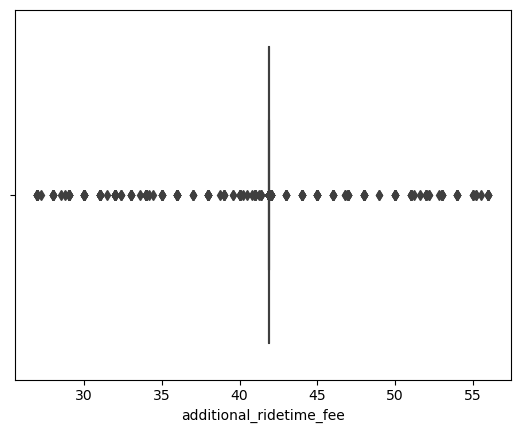

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


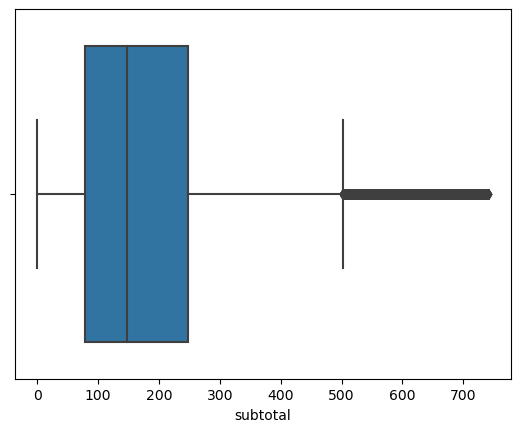

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


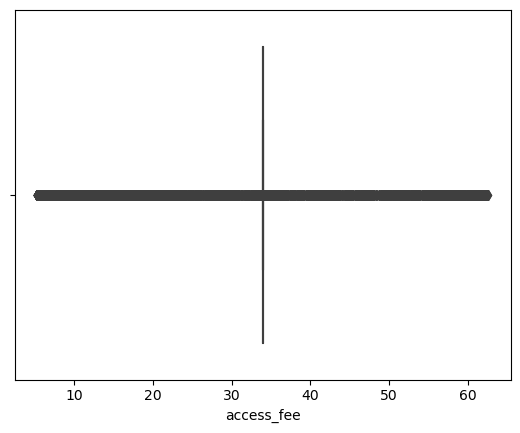

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


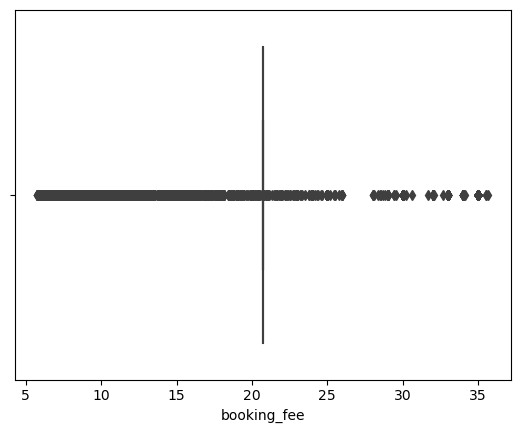

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


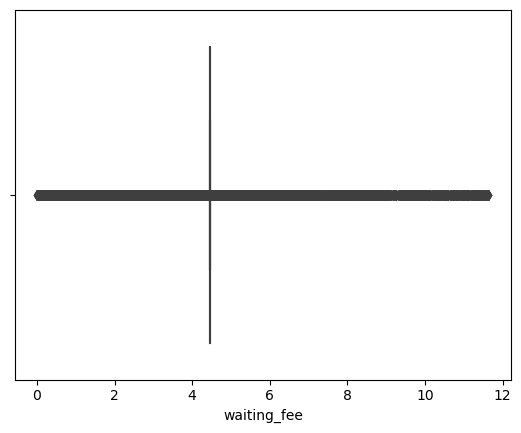

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


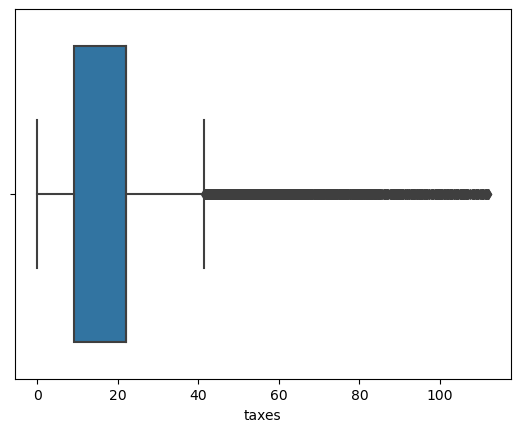

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


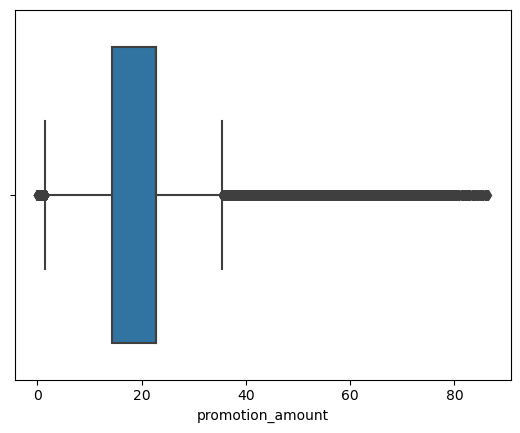

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


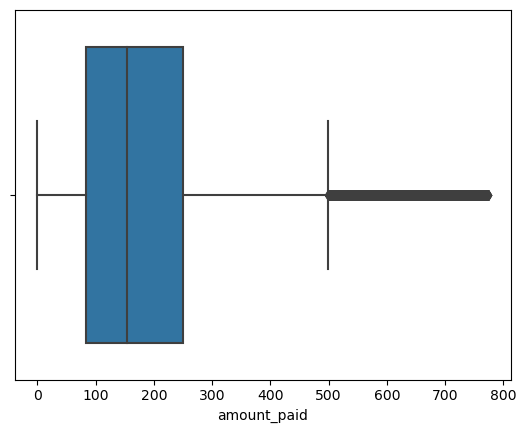

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


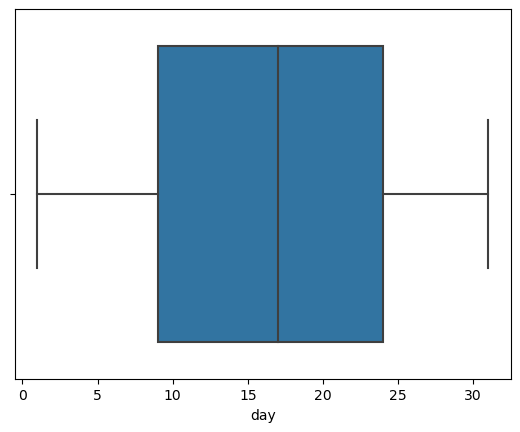

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


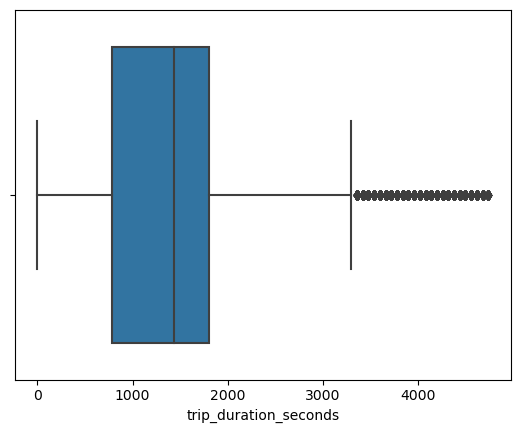

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


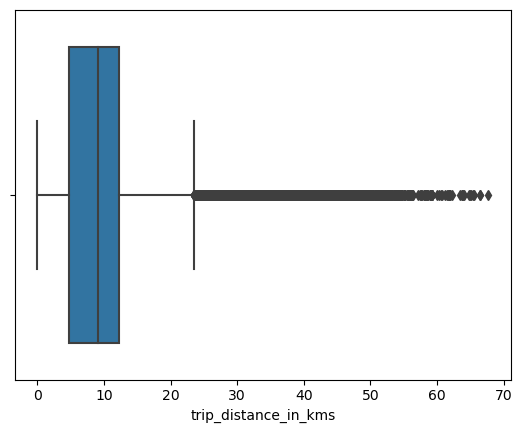

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


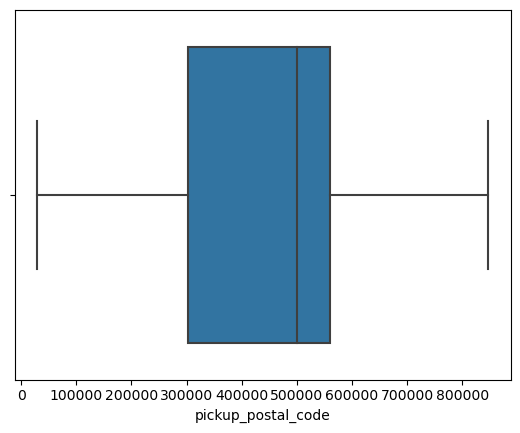

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


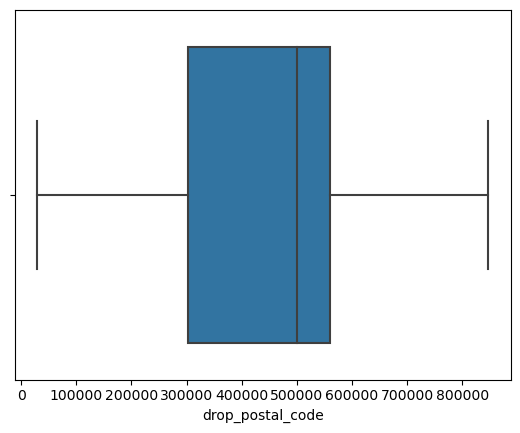

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


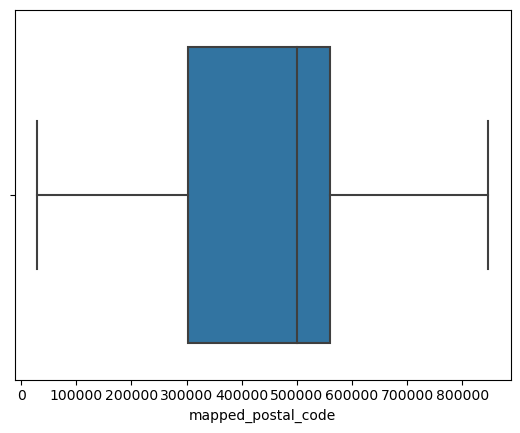

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


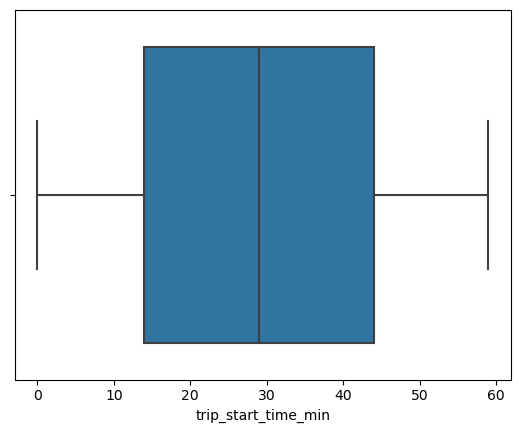

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


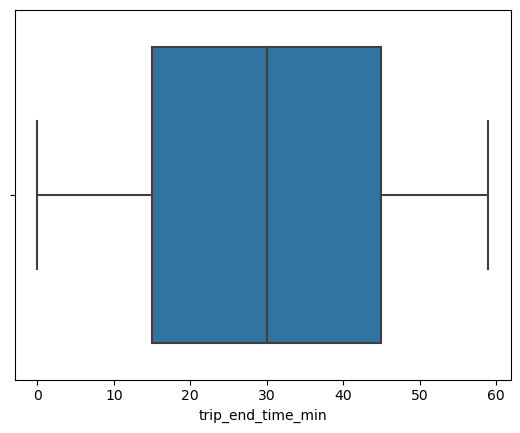

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


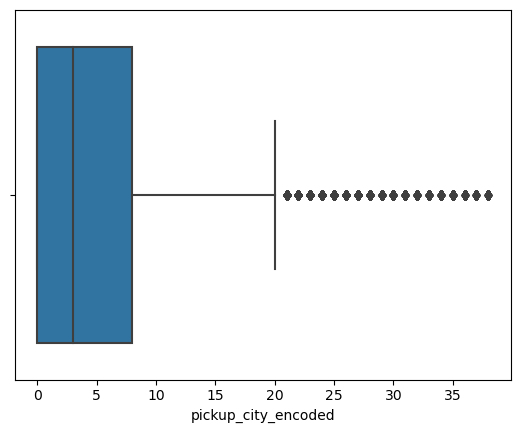

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


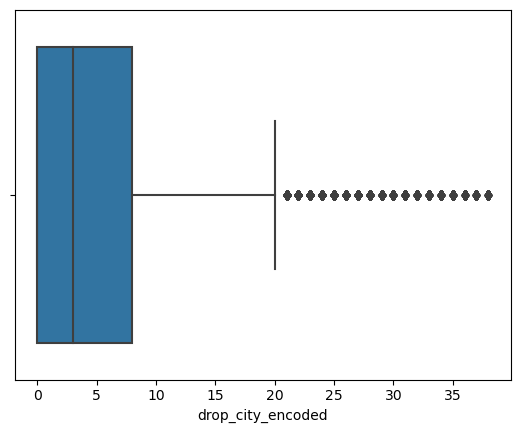

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


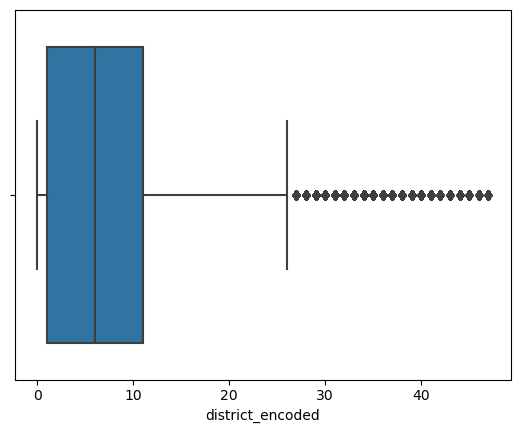

In [1747]:
for feature in cont_features:
    sns.boxplot(data[feature])
    plt.show()

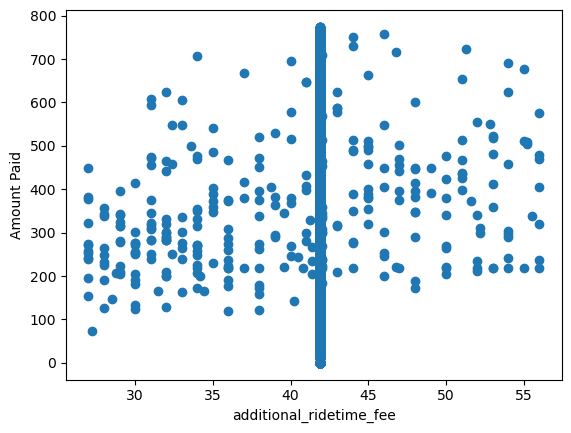

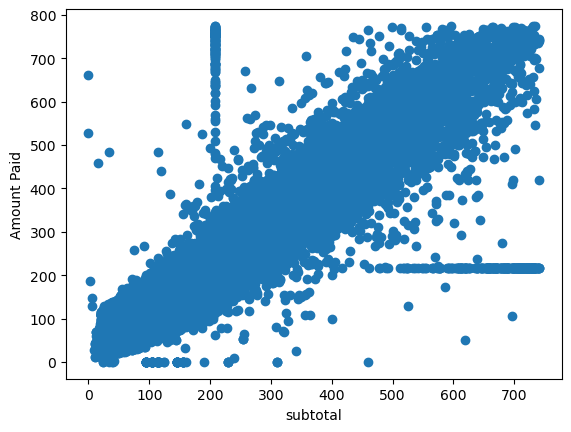

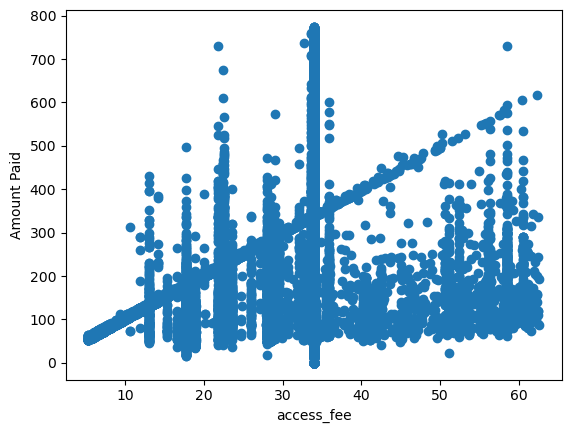

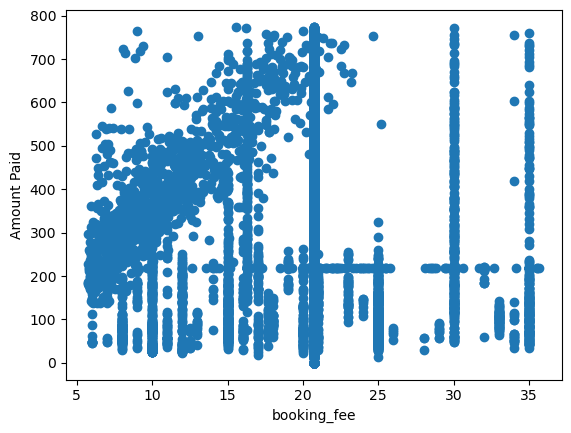

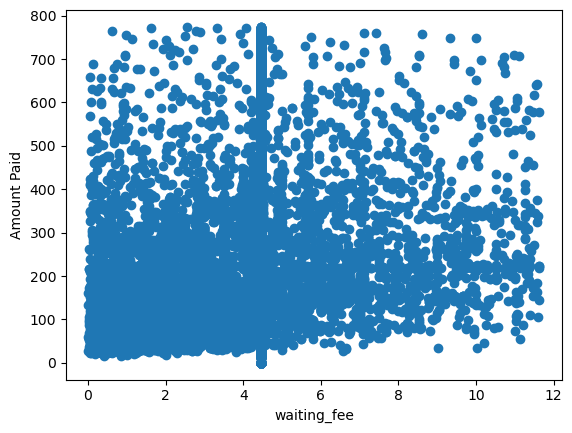

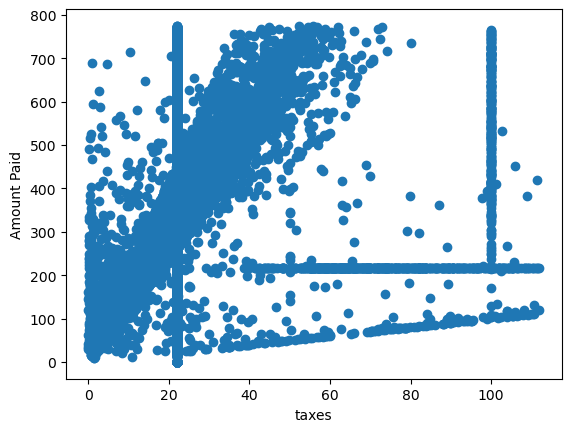

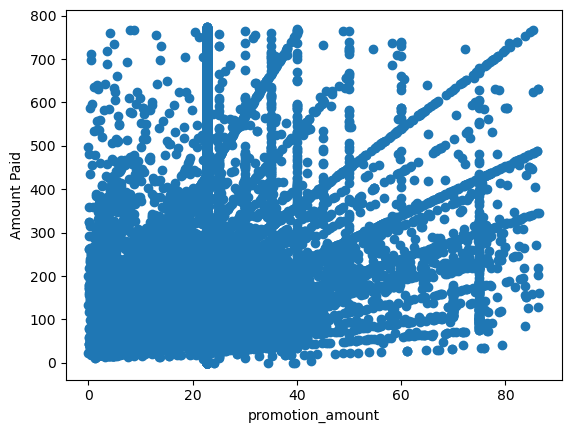

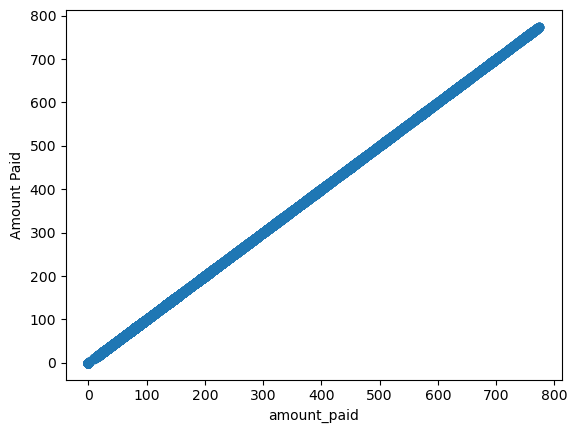

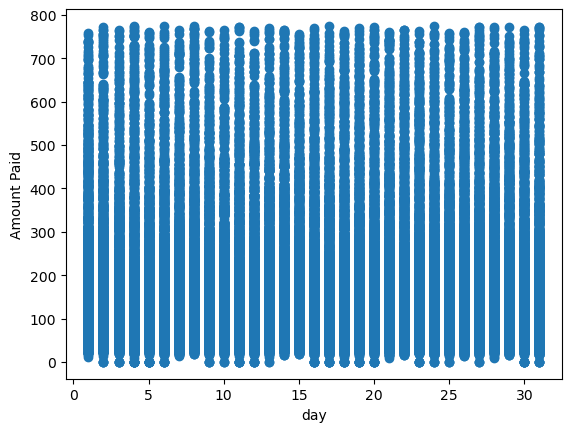

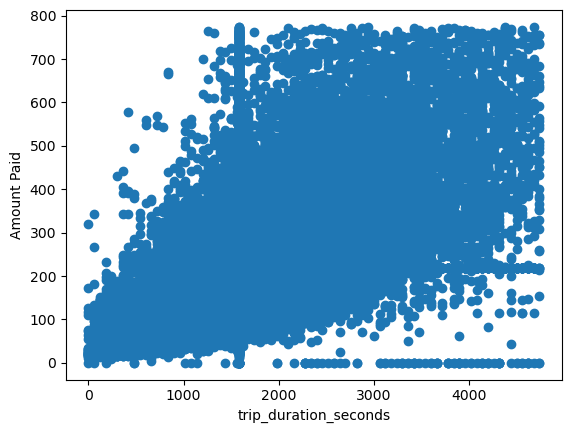

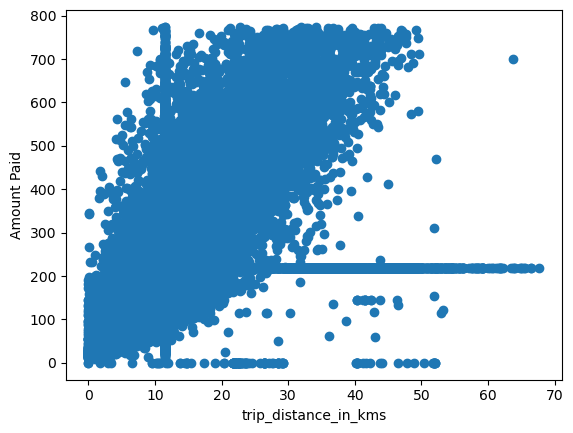

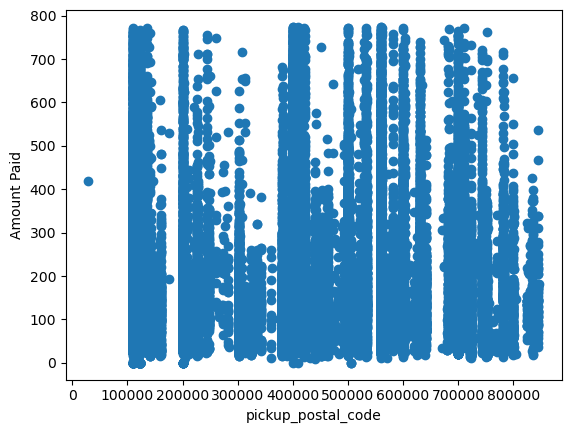

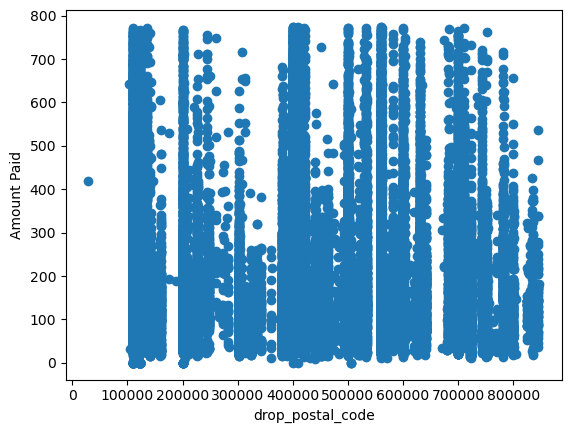

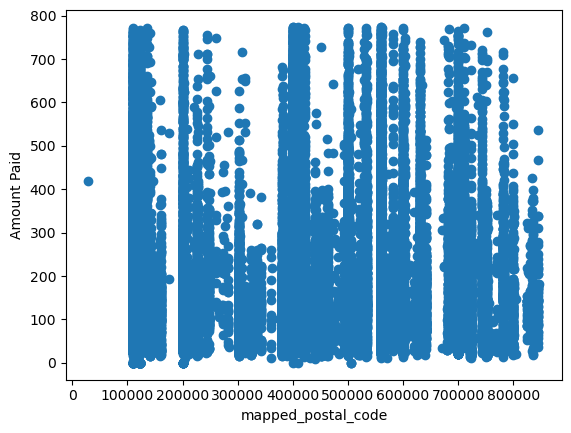

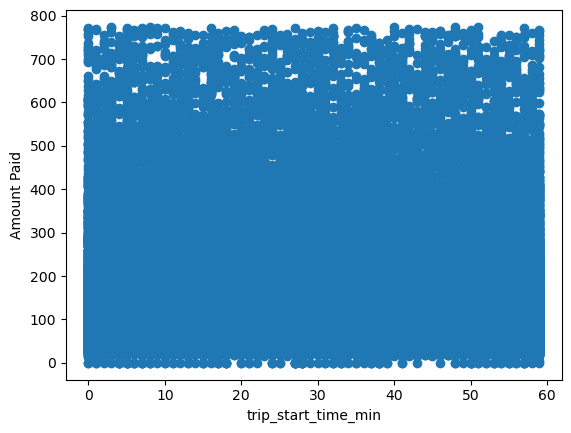

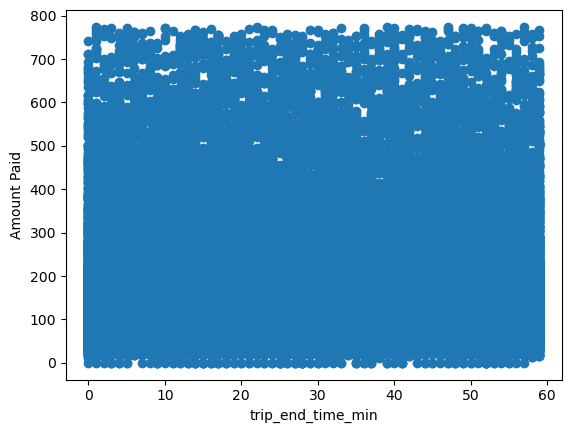

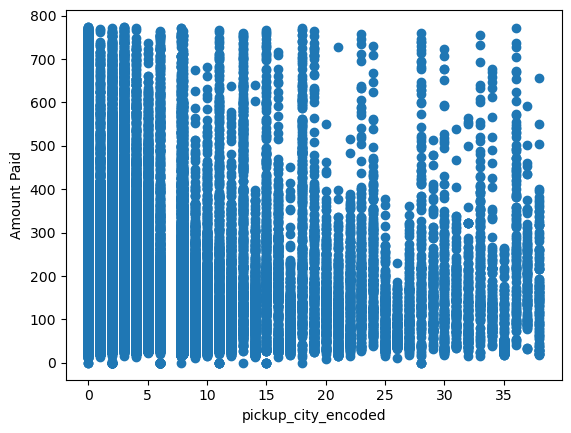

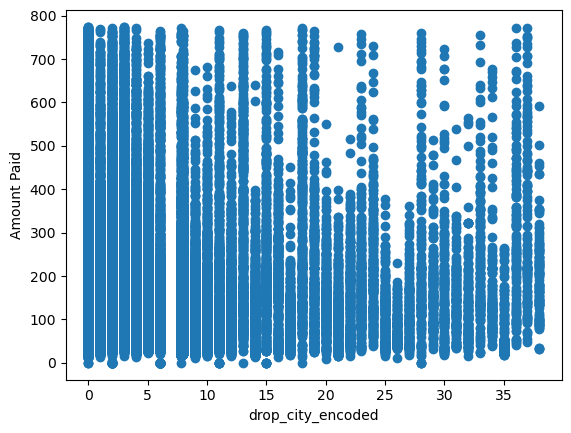

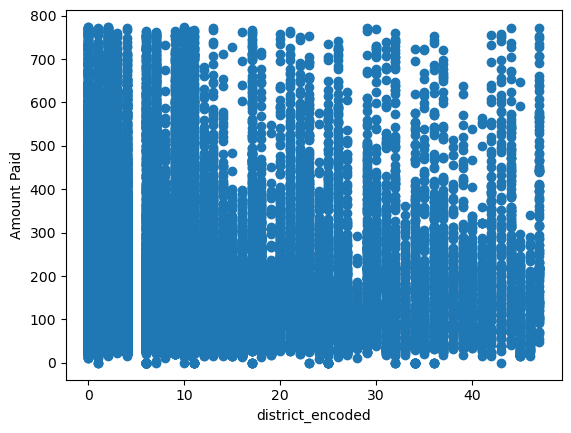

In [1748]:
for feature in cont_features:
    plt.scatter(data[feature],data['amount_paid'])
    plt.xlabel(feature)
    plt.ylabel('Amount Paid')
    plt.show()


In [1749]:
target=data['amount_paid']
data.drop(['amount_paid'],inplace=True,axis=1)
data['amount_paid']=target

In [1750]:
data.head()

,additional_ridetime_fee,subtotal,access_fee,booking_fee,waiting_fee,interstate_fee,taxes,promotion_amount,day,trip_duration_seconds,trip_distance_in_kms,pickup_postal_code,drop_postal_code,mapped_postal_code,company_encoded,payment_method_encoded,metro_encoded,tier_encoded,user_gender_encoded,user_state_encoded,age_group_encoded,zone_encoded,state_encoded,vehicle_type_encoded,trip_start_time_hour,trip_start_time_min,trip_end_time_hour,trip_end_time_min,pickup_city_encoded,drop_city_encoded,intercity,district_encoded,amount_paid
0,41.883795,261.11,33.952453,11.000000,4.466169,107.182642,15.85,21.77000,1,2460.0,17.22,500034.0,500034.0,500034.0,1,0,0,0,0,3,1,0,2,1,12,16,12,59,1.0,1.0,0,1.0,250.00
1,41.883795,280.29,33.952453,20.753215,4.466169,107.182642,13.34,37.95000,1,2040.0,17.91,400706.0,400706.0,400706.0,1,0,0,0,1,0,2,2,0,1,20,56,21,30,13.0,13.0,0,10.0,278.00
2,41.883795,425.39,33.952453,20.753215,4.466169,107.182642,30.93,22.74849,1,2280.0,15.19,560001.0,560001.0,560001.0,1,4,0,0,0,1,2,0,1,0,10,45,11,23,0.0,0.0,0,0.0,425.39
3,41.883795,295.35,33.952453,20.753215,4.466169,107.182642,15.90,22.74849,1,1260.0,6.83,560075.0,560075.0,560075.0,1,4,0,0,0,1,2,0,1,0,16,51,17,12,0.0,0.0,0,0.0,192.20
4,41.883795,538.84,33.952453,20.753215,4.466169,107.182642,22.14,32.77000,1,1560.0,8.60,560037.0,560037.0,560037.0,1,4,0,0,0,1,2,0,1,0,18,12,18,38,0.0,0.0,0,0.0,267.76


# Splitting data into train and test

In [1751]:
grouped_company = data.groupby('company_encoded')
ola_data = grouped_company.get_group(0)
uber_data = grouped_company.get_group(1)
ola_data.head()

,additional_ridetime_fee,subtotal,access_fee,booking_fee,waiting_fee,interstate_fee,taxes,promotion_amount,day,trip_duration_seconds,trip_distance_in_kms,pickup_postal_code,drop_postal_code,mapped_postal_code,company_encoded,payment_method_encoded,metro_encoded,tier_encoded,user_gender_encoded,user_state_encoded,age_group_encoded,zone_encoded,state_encoded,vehicle_type_encoded,trip_start_time_hour,trip_start_time_min,trip_end_time_hour,trip_end_time_min,pickup_city_encoded,drop_city_encoded,intercity,district_encoded,amount_paid
23078,41.883795,107.33,33.952453,20.753215,4.466169,107.182642,21.99881,22.74849,1,1579.473709,11.542275,799157.0,799157.0,799157.0,0,0,1,1,0,2,0,1,20,0,20,56,21,5,7.806104,7.819179,0,10.693648,107.0
23079,41.883795,127.56,33.952453,20.753215,4.466169,107.182642,21.99881,12.76000,1,1579.473709,11.542275,723215.0,723215.0,723215.0,0,0,0,2,1,7,0,1,8,2,10,59,11,19,9.000000,9.000000,0,8.000000,115.0
23080,41.883795,133.86,33.952453,20.753215,4.466169,107.182642,21.99881,13.39000,1,1579.473709,11.542275,641001.0,641001.0,641001.0,0,0,1,1,0,4,1,0,4,2,21,10,21,37,29.000000,29.000000,0,38.000000,123.0
23081,41.883795,139.34,17.740000,20.753215,4.466169,107.182642,21.99881,6.28000,1,1579.473709,11.542275,521456.0,521456.0,521456.0,0,0,0,2,1,10,3,0,10,1,20,32,20,54,17.000000,17.000000,0,19.000000,153.0
23082,41.883795,159.06,26.020000,20.753215,5.000000,107.182642,21.99881,6.65000,1,1579.473709,11.542275,208017.0,208017.0,208017.0,0,0,0,2,0,6,1,1,5,1,13,41,14,32,31.000000,31.000000,0,40.000000,183.0


In [1752]:
ola_x=ola_data.iloc[:,:-1]
ola_y=ola_data.iloc[:,-1]
ola_y.head()

23078    107.0
23079    115.0
23080    123.0
23081    153.0
23082    183.0
Name: amount_paid, dtype: float64

In [1753]:
uber_x=uber_data.iloc[:,:-1]
uber_y=uber_data.iloc[:,-1]
uber_y.head()

0    250.00
1    278.00
2    425.39
3    192.20
4    267.76
Name: amount_paid, dtype: float64

In [1754]:
ola_x_train,ola_x_test,ola_y_train,ola_y_test=train_test_split(ola_x,ola_y,test_size=0.2,random_state=1)
uber_x_train,uber_x_test,uber_y_train,uber_y_test=train_test_split(uber_x,uber_y,test_size=0.2,random_state=1)

In [1755]:
from sklearn.preprocessing import StandardScaler
ola_sc_features = StandardScaler()
ola_x_train_scaled = sc_features.fit_transform(ola_x_train)
ola_x_test_scaled = sc_features.transform(ola_x_test)
ola_sc_target = StandardScaler()
ola_y_train =ola_y_train.values.reshape(-1, 1)
ola_y_train_scaled = sc_target.fit_transform(ola_y_train)

In [1756]:
ola_sc_features = StandardScaler()
uber_x_train_scaled = sc_features.fit_transform(uber_x_train)
uber_x_test_scaled = sc_features.transform(uber_x_test)
ola_sc_target = StandardScaler()
uber_y_train =uber_y_train.values.reshape(-1, 1)
uber_y_train_scaled = sc_target.fit_transform(uber_y_train)

# Building the model

# Linear regression model

In [1757]:
ola_lr=LinearRegression()
ola_lr.fit(ola_x_train,ola_y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [1758]:
uber_lr=LinearRegression()
uber_lr.fit(uber_x_train,uber_y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [1759]:
ola_y_pred=lr.predict(ola_x_test)

In [1760]:
uber_y_pred=lr.predict(uber_x_test)

In [1761]:
np.mean(list(ola_y_pred))

187.109561263398

In [1762]:
np.mean(list(uber_y_pred))

182.0139735154165

In [1763]:
print('ola MAE:', mean_absolute_error(ola_y_test,ola_y_pred))
print('ola MSE:', mean_squared_error(ola_y_test, ola_y_pred))
print('ola RMSE:', np.sqrt(mean_squared_error(ola_y_test,ola_y_pred)))

ola MAE: 27.22732290690211
ola MSE: 2669.0366833742846
ola RMSE: 51.66272044109064


In [1764]:
rscore=ola_lr.score(ola_x_test,ola_y_test)
rscore

0.8966679645702723

In [1765]:
print('uber MAE:', mean_absolute_error(uber_y_test,uber_y_pred))
print('uber MSE:', mean_squared_error(uber_y_test, uber_y_pred))
print('uber RMSE:', np.sqrt(mean_squared_error(uber_y_test,uber_y_pred)))

uber MAE: 22.826725561502393
uber MSE: 2907.4880040137737
uber RMSE: 53.921127621867974


In [1766]:
rscore=uber_lr.score(uber_x_test,uber_y_test)
rscore

0.870360377636358

# Ridge regression model

In [1767]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(ola_x_train,ola_y_train)
ola_y_pred=ridge.predict(ola_x_test)

C:\Users\dbansbanka\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [1768]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(uber_x_train,uber_y_train)
uber_y_pred=ridge.predict(uber_x_test)

C:\Users\dbansbanka\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [1769]:
np.mean(list(ola_y_pred))

200.28372969839393

In [1770]:
np.mean(list(uber_y_pred))

182.02164286747296

In [1771]:
ola_rscore=ridge.score(ola_x_test,ola_y_test)
ola_rscore

0.8753011107194533

In [1772]:
uber_rscore=ridge.score(uber_x_test,uber_y_test)
uber_rscore

0.8703731320348712

In [1773]:
print('ola MAE:', mean_absolute_error(ola_y_test,ola_y_pred))
print('ola MSE:', mean_squared_error(ola_y_test, ola_y_pred))
print('ola RMSE:', np.sqrt(mean_squared_error(ola_y_test,ola_y_pred)))

ola MAE: 22.969104426535043
ola MSE: 2232.45058852907
ola RMSE: 47.24881573678932


In [1774]:
print('uber MAE:', mean_absolute_error(uber_y_test,uber_y_pred))
print('uber MSE:', mean_squared_error(uber_y_test, uber_y_pred))
print('uber RMSE:', np.sqrt(mean_squared_error(uber_y_test,uber_y_pred)))

uber MAE: 22.968342058118637
uber MSE: 2907.2019551962953
uber RMSE: 53.918475082260024


# Lasso regression model

In [1775]:
lasso=Lasso(alpha=0.0005,normalize=True)
lasso.fit(ola_x_train,ola_y_train)
ola_y_pred=lasso.predict(ola_x_test)

C:\Users\dbansbanka\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [1776]:
lasso=Lasso(alpha=0.0005,normalize=True)
lasso.fit(uber_x_train,uber_y_train)
uber_y_pred=lasso.predict(uber_x_test)

C:\Users\dbansbanka\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [1777]:
np.mean(list(ola_y_pred))

200.25579408797657

In [1778]:
sum(list(ola_y_pred))


1017900.2013491843

In [1779]:
sum(list(uber_y_pred))

840220.1382795196

In [1780]:
np.mean(list(uber_y_pred))

182.02342683698456

In [1781]:
print('ola MAE:', mean_absolute_error(ola_y_test,ola_y_pred))
print('ola MSE:', mean_squared_error(ola_y_test, ola_y_pred))
print('ola RMSE:', np.sqrt(mean_squared_error(ola_y_test,ola_y_pred)))

ola MAE: 22.710617863522398
ola MSE: 2225.30880263104
ola RMSE: 47.17317884805984


In [1782]:
print('uber MAE:', mean_absolute_error(uber_y_test,uber_y_pred))
print('uber MSE:', mean_squared_error(uber_y_test, uber_y_pred))
print('uber RMSE:', np.sqrt(mean_squared_error(uber_y_test,uber_y_pred)))

uber MAE: 22.77880308853703
uber MSE: 2905.8461088185936
uber RMSE: 53.90590050095253


In [1783]:
ola_rscore=lasso.score(ola_x_test,ola_y_test)
ola_rscore

0.87630801290666

In [1784]:
uber_rscore=lasso.score(uber_x_test,uber_y_test)
uber_rscore

0.8704335867683545

# Extra Trees Regressor Model

In [1785]:
ola_x_train,ola_x_test,ola_y_train,ola_y_test=train_test_split(x,y,test_size=0.2,random_state=0)
uber_x_train,uber_x_test,uber_y_train,uber_y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=ExtraTreesRegressor()
model.fit(ola_x_train,ola_y_train)
model.fit(uber_x_train,uber_y_train)

ExtraTreesRegressor()

In [1786]:
array=model.feature_importances_

In [1787]:
ser=pd.Series(array,index=ola_x_train.columns).sort_values(ascending=False)
ser.head()

subtotal                 0.685824
trip_distance_in_kms     0.082080
vehicle_type_encoded     0.075960
trip_duration_seconds    0.057044
taxes                    0.025564
dtype: float64

In [1788]:
ser=pd.Series(array,index=uber_x_train.columns).sort_values(ascending=False)
ser.head()

subtotal                 0.685824
trip_distance_in_kms     0.082080
vehicle_type_encoded     0.075960
trip_duration_seconds    0.057044
taxes                    0.025564
dtype: float64

<AxesSubplot:>

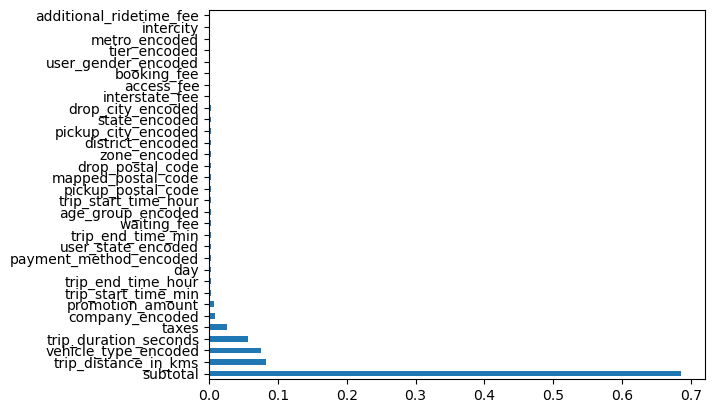

In [1789]:
ser.plot(kind='barh')

# Random Forest Regressor

In [1790]:
n_estimators=[x for x in range(10,100,10)]
max_features=['auto','sqrt','log2']
max_depth=[x for x in range(5,30,5)]
min_sample_leaf=[2,4,6,8,10]
min_sample_split=[2,3,4,5]
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf':min_sample_leaf,
    'min_samples_split':min_sample_split
}
model=RandomForestRegressor()
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [1791]:
rd=RandomizedSearchCV(estimator=model,param_distributions=random_grid,cv=5,n_iter=10,verbose=2,random_state=0,scoring='neg_mean_squared_error')

In [1792]:
rd.fit(ola_x_train,ola_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   8.2s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   4.9s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   7.0s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   5.4s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   5.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=  36.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=  36.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [1793]:
rd.fit(uber_x_train,uber_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   6.5s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   9.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   6.9s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   8.3s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   6.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=  41.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=  49.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [1794]:
rd.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [1795]:
model=RandomForestRegressor(n_estimators=70,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=20)
model.fit(ola_x_train,ola_y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=70)

In [1796]:
model=RandomForestRegressor(n_estimators=70,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=20)
model.fit(uber_x_train,uber_y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=70)

In [1797]:
y_pred=model.predict(ola_x_test)
model.score(ola_x_test,ola_y_test)


0.9373036871166888

In [1798]:
y_pred=model.predict(uber_x_test)
model.score(uber_x_test,uber_y_test)


0.9373036871166888

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_paid', ylabel='Density'>

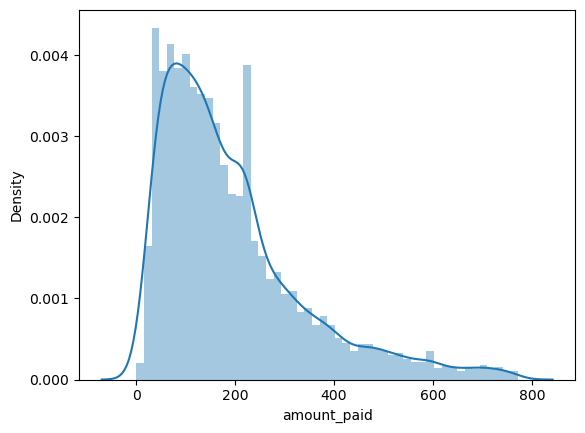

In [1801]:
sns.distplot(ola_y_test)

C:\Users\dbansbanka\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_paid', ylabel='Density'>

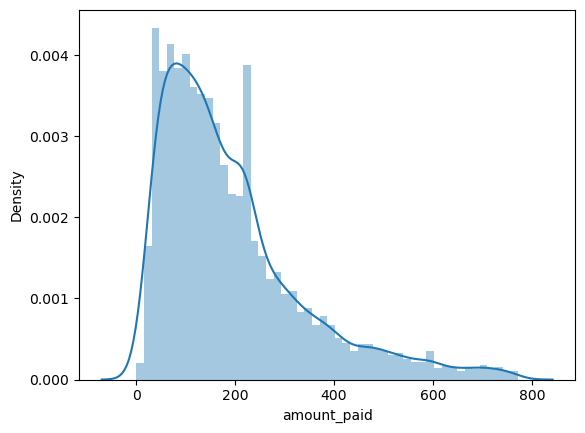

In [1802]:
sns.distplot(uber_y_test)

# Accuracy Analysis

# INFERENCE

In [ ]:
Based on the evaluation metrics you have provided, the Lasso regression model would be a better choice for both Ola and Uber 
datasets, compared to Linear Regression and Ridge Regression models.

1.Lower Mean Absolute Error (MAE): The Lasso regression model has lower MAE values for both Ola and Uber datasets, 
compared to the other models. MAE measures the average absolute difference between the predicted and actual values, 
so lower MAE indicates better performance.

2.Lower Root Mean Squared Error (RMSE): The Lasso regression model has lower RMSE values for the Ola dataset, 
and slightly higher RMSE values for the Uber dataset, compared to the other models. RMSE measures the square root 
of the average squared difference between the predicted and actual values, so lower RMSE indicates better performance.

3.Higher R-squared (rscore): The Lasso regression model has higher R-squared values for both Ola and Uber datasets, 
compared to the other models. R-squared measures the proportion of variance in the dependent variable that is explained by 
the independent variable(s) in the model, so higher R-squared indicates better fit.

Overall, the Lasso regression model is better because it has lower MAE and RMSE values and higher R-squared values, 
indicating better performance and fit for both Ola and Uber datasets.

# Answer

In [ ]:
Average Revenue per Person_OLA::200.25579408797657
Average Revenue per Person_UBER:182.02342683698456

    
Total Sales Value = (Total Number of People in India) x (Average Revenue per Person)
Total number of people in the sample(test sample is 20% of total sample): 20% of 48490=9698
Total revenue generated in the sample OLA: Rs. 1860796.2026954077
Total revenue generated in the sample UBER: Rs. 1860758.2025838124


Average Revenue per Person = Total Revenue Generated / Total Number of People in the Sample

Average Revenue per Person OLA= Rs. 1860796.2026954077 / 9698  = 200.25579408797657
Average Revenue per Person UBER= Rs. 1860758.2025838124 /9698  =  182.02342683698456

Next, to calculate the total sales value for Ola and Uber for the whole population of India,  multiply the 
average revenue per person by the monthly active users of OLA nd UBER in India. According to the 2023 population estimates
(SOURCE: https://www.worldometers.info/world-population/india-population/#:~:text=The%20current%20population%20of%20India,the%20latest%
20United%20Nations%20data.)

Total Sales Value OLA =Rs. 24 million x 200.25579408797657 

Total Sales Value OLA = Rs. 4.806 billion

Total Sales Value UBER =Rs. 13.13 million x 182.02342683698456 

Total Sales Value UBER= Rs. 2.3 billion



**According to online stats (which is data from 2020-2021) 
**Total Sales Value UBER:Rs. 1.79 billion
**Total Sales Value OLA: Rs. 5.5 billion



